In [45]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3))
in_p = Input(shape=(96, 96, 3))
in_n = Input(shape=(96, 96, 3))

# Output for anchor, positive and negative embedding vectors

emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss


triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])


nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)



In [50]:
import numpy as np
import os
import cv2
import numpy as np

paths={'person1' : "dataset/aligned_train_resize/00001/",'person2' : "dataset/aligned_train_resize/00002/",'person3' : "dataset/aligned_train_resize/00003/",'person4' : "dataset/aligned_train_resize/00004/",'person5' : "dataset/aligned_train_resize/00005/",'person6' : "dataset/aligned_train_resize/00006/",'person7' : "dataset/aligned_train_resize/00007/",'person8' : "dataset/aligned_train_resize/00008/",'person9' : "dataset/aligned_train_resize/00009/",'person10' : "dataset/aligned_train_resize/00010/",'person12' : "dataset/aligned_train_resize/00012/",'person13' : "dataset/aligned_train_resize/00013/",'person14' : "dataset/aligned_train_resize/00014/",'person15' : "dataset/aligned_train_resize/00015/",'person16' : "dataset/aligned_train_resize/00016/",'person17' : "dataset/aligned_train_resize/00017/",'person18' : "dataset/aligned_train_resize/00018/",'person19' : "dataset/aligned_train_resize/00019/",'person20' : "dataset/aligned_train_resize/00020/",'person21' : "dataset/aligned_train_resize/00021/",'person22' : "dataset/aligned_train_resize/00022/",'person23' : "dataset/aligned_train_resize/00023/",'person24' : "dataset/aligned_train_resize/00024/",'person25' : "dataset/aligned_train_resize/00025/",'person26' : "dataset/aligned_train_resize/00026/",'person27' : "dataset/aligned_train_resize/00027/",'person28' : "dataset/aligned_train_resize/00028/",'person29' : "dataset/aligned_train_resize/00029/",'person30' : "dataset/aligned_train_resize/00030/",'person31' : "dataset/aligned_train_resize/00031/",'person32' : "dataset/aligned_train_resize/00032/",'person33' : "dataset/aligned_train_resize/00033/",'person34' : "dataset/aligned_train_resize/00034/",'person35' : "dataset/aligned_train_resize/00035/",'person36' : "dataset/aligned_train_resize/00036/",'person37' : "dataset/aligned_train_resize/00037/",'person38' : "dataset/aligned_train_resize/00038/",'person39' : "dataset/aligned_train_resize/00039/",'person40' : "dataset/aligned_train_resize/00040/",'person41' : "dataset/aligned_train_resize/00041/",'person42' : "dataset/aligned_train_resize/00042/",'person43' : "dataset/aligned_train_resize/00043/",'person44' : "dataset/aligned_train_resize/00044/",'person45' : "dataset/aligned_train_resize/00045/",'person46' : "dataset/aligned_train_resize/00046/",'person47' : "dataset/aligned_train_resize/00047/",'person48' : "dataset/aligned_train_resize/00048/",'person49' : "dataset/aligned_train_resize/00049/",'person50' : "dataset/aligned_train_resize/00050/",'person51' : "dataset/aligned_train_resize/00051/",'person52' : "dataset/aligned_train_resize/00052/",'person53' : "dataset/aligned_train_resize/00053/",'person54' : "dataset/aligned_train_resize/00054/",'person55' : "dataset/aligned_train_resize/00055/",'person56' : "dataset/aligned_train_resize/00056/",'person57' : "dataset/aligned_train_resize/00057/",'person58' : "dataset/aligned_train_resize/00058/",'person59' : "dataset/aligned_train_resize/00059/",'person60' : "dataset/aligned_train_resize/00060/",'person61' : "dataset/aligned_train_resize/00061/",'person62' : "dataset/aligned_train_resize/00062/",'person63' : "dataset/aligned_train_resize/00063/",'person64' : "dataset/aligned_train_resize/00064/",'person65' : "dataset/aligned_train_resize/00065/",'person66' : "dataset/aligned_train_resize/00066/",'person67' : "dataset/aligned_train_resize/00067/",'person68' : "dataset/aligned_train_resize/00068/",'person69' : "dataset/aligned_train_resize/00069/",'person70' : "dataset/aligned_train_resize/00070/",'person71' : "dataset/aligned_train_resize/00071/",'person72' : "dataset/aligned_train_resize/00072/",'person73' : "dataset/aligned_train_resize/00073/",'person74' : "dataset/aligned_train_resize/00074/",'person75' : "dataset/aligned_train_resize/00075/",'person76' : "dataset/aligned_train_resize/00076/",'person77' : "dataset/aligned_train_resize/00077/",'person78' : "dataset/aligned_train_resize/00078/",'person79' : "dataset/aligned_train_resize/00079/",'person80' : "dataset/aligned_train_resize/00080/",'person81' : "dataset/aligned_train_resize/00081/",'person82' : "dataset/aligned_train_resize/00082/",'person83' : "dataset/aligned_train_resize/00083/",'person84' : "dataset/aligned_train_resize/00084/",'person85' : "dataset/aligned_train_resize/00085/",'person86' : "dataset/aligned_train_resize/00086/",'person87' : "dataset/aligned_train_resize/00087/",'person88' : "dataset/aligned_train_resize/00088/",'person89' : "dataset/aligned_train_resize/00089/",'person90' : "dataset/aligned_train_resize/00090/",'person91' : "dataset/aligned_train_resize/00091/",'person92' : "dataset/aligned_train_resize/00092/",'person93' : "dataset/aligned_train_resize/00093/",'person94' : "dataset/aligned_train_resize/00094/",'person95' : "dataset/aligned_train_resize/00095/",'person96' : "dataset/aligned_train_resize/00096/",'person97' : "dataset/aligned_train_resize/00097/",'person98' : "dataset/aligned_train_resize/00098/",'person99' : "dataset/aligned_train_resize/00099/",'person100' : "dataset/aligned_train_resize/00100/",'person101' : "dataset/aligned_train_resize/00101/",'person102' : "dataset/aligned_train_resize/00102/",'person103' : "dataset/aligned_train_resize/00103/",'person104' : "dataset/aligned_train_resize/00104/",'person105' : "dataset/aligned_train_resize/00105/",'person106' : "dataset/aligned_train_resize/00106/",'person107' : "dataset/aligned_train_resize/00107/",'person108' : "dataset/aligned_train_resize/00108/",'person109' : "dataset/aligned_train_resize/00109/",'person110' : "dataset/aligned_train_resize/00110/",'person111' : "dataset/aligned_train_resize/00111/",'person112' : "dataset/aligned_train_resize/00112/",'person113' : "dataset/aligned_train_resize/00113/",'person114' : "dataset/aligned_train_resize/00114/",'person115' : "dataset/aligned_train_resize/00115/",'person116' : "dataset/aligned_train_resize/00116/",'person117' : "dataset/aligned_train_resize/00117/",'person118' : "dataset/aligned_train_resize/00118/",'person119' : "dataset/aligned_train_resize/00119/",'person120' : "dataset/aligned_train_resize/00120/",'person121' : "dataset/aligned_train_resize/00121/",'person122' : "dataset/aligned_train_resize/00122/",'person123' : "dataset/aligned_train_resize/00123/",'person124' : "dataset/aligned_train_resize/00124/",'person125' : "dataset/aligned_train_resize/00125/",'person126' : "dataset/aligned_train_resize/00126/",'person127' : "dataset/aligned_train_resize/00127/",'person128' : "dataset/aligned_train_resize/00128/",'person129' : "dataset/aligned_train_resize/00129/",'person130' : "dataset/aligned_train_resize/00130/",'person131' : "dataset/aligned_train_resize/00131/",'person132' : "dataset/aligned_train_resize/00132/",'person133' : "dataset/aligned_train_resize/00133/",'person134' : "dataset/aligned_train_resize/00134/",'person135' : "dataset/aligned_train_resize/00135/",'person136' : "dataset/aligned_train_resize/00136/",'person137' : "dataset/aligned_train_resize/00137/",'person138' : "dataset/aligned_train_resize/00138/",'person139' : "dataset/aligned_train_resize/00139/",'person140' : "dataset/aligned_train_resize/00140/",'person141' : "dataset/aligned_train_resize/00141/",'person142' : "dataset/aligned_train_resize/00142/",'person143' : "dataset/aligned_train_resize/00143/",'person144' : "dataset/aligned_train_resize/00144/",'person145' : "dataset/aligned_train_resize/00145/",'person146' : "dataset/aligned_train_resize/00146/",'person147' : "dataset/aligned_train_resize/00147/",'person148' : "dataset/aligned_train_resize/00148/",'person149' : "dataset/aligned_train_resize/00149/",'person150' : "dataset/aligned_train_resize/00150/",'person151' : "dataset/aligned_train_resize/00151/",'person152' : "dataset/aligned_train_resize/00152/",'person153' : "dataset/aligned_train_resize/00153/",'person154' : "dataset/aligned_train_resize/00154/",'person155' : "dataset/aligned_train_resize/00155/",'person156' : "dataset/aligned_train_resize/00156/",'person157' : "dataset/aligned_train_resize/00157/",'person158' : "dataset/aligned_train_resize/00158/",'person159' : "dataset/aligned_train_resize/00159/",'person160' : "dataset/aligned_train_resize/00160/",'person161' : "dataset/aligned_train_resize/00161/",'person162' : "dataset/aligned_train_resize/00162/",'person163' : "dataset/aligned_train_resize/00163/",'person164' : "dataset/aligned_train_resize/00164/",'person165' : "dataset/aligned_train_resize/00165/",'person166' : "dataset/aligned_train_resize/00166/",'person167' : "dataset/aligned_train_resize/00167/",'person168' : "dataset/aligned_train_resize/00168/",'person169' : "dataset/aligned_train_resize/00169/",'person170' : "dataset/aligned_train_resize/00170/",'person171' : "dataset/aligned_train_resize/00171/",'person172' : "dataset/aligned_train_resize/00172/",'person173' : "dataset/aligned_train_resize/00173/",'person174' : "dataset/aligned_train_resize/00174/",'person175' : "dataset/aligned_train_resize/00175/",'person176' : "dataset/aligned_train_resize/00176/",'person177' : "dataset/aligned_train_resize/00177/",'person178' : "dataset/aligned_train_resize/00178/",'person179' : "dataset/aligned_train_resize/00179/",'person180' : "dataset/aligned_train_resize/00180/",'person181' : "dataset/aligned_train_resize/00181/",'person182' : "dataset/aligned_train_resize/00182/",'person183' : "dataset/aligned_train_resize/00183/",'person184' : "dataset/aligned_train_resize/00184/",'person185' : "dataset/aligned_train_resize/00185/",'person186' : "dataset/aligned_train_resize/00186/",'person187' : "dataset/aligned_train_resize/00187/",'person188' : "dataset/aligned_train_resize/00188/",'person189' : "dataset/aligned_train_resize/00189/",'person190' : "dataset/aligned_train_resize/00190/",'person191' : "dataset/aligned_train_resize/00191/",'person192' : "dataset/aligned_train_resize/00192/",'person193' : "dataset/aligned_train_resize/00193/",'person194' : "dataset/aligned_train_resize/00194/",'person195' : "dataset/aligned_train_resize/00195/",'person196' : "dataset/aligned_train_resize/00196/",'person197' : "dataset/aligned_train_resize/00197/",'person198' : "dataset/aligned_train_resize/00198/",'person199' : "dataset/aligned_train_resize/00199/",'person200' : "dataset/aligned_train_resize/00200/",'person201' : "dataset/aligned_train_resize/00201/",'person202' : "dataset/aligned_train_resize/00202/",'person203' : "dataset/aligned_train_resize/00203/",'person204' : "dataset/aligned_train_resize/00204/",'person205' : "dataset/aligned_train_resize/00205/",'person206' : "dataset/aligned_train_resize/00206/",'person207' : "dataset/aligned_train_resize/00207/",'person208' : "dataset/aligned_train_resize/00208/",'person209' : "dataset/aligned_train_resize/00209/",'person210' : "dataset/aligned_train_resize/00210/",'person211' : "dataset/aligned_train_resize/00211/",'person212' : "dataset/aligned_train_resize/00212/",'person213' : "dataset/aligned_train_resize/00213/",'person214' : "dataset/aligned_train_resize/00214/",'person215' : "dataset/aligned_train_resize/00215/",'person216' : "dataset/aligned_train_resize/00216/",'person217' : "dataset/aligned_train_resize/00217/",'person218' : "dataset/aligned_train_resize/00218/",'person219' : "dataset/aligned_train_resize/00219/",'person220' : "dataset/aligned_train_resize/00220/",'person221' : "dataset/aligned_train_resize/00221/",'person222' : "dataset/aligned_train_resize/00222/",'person223' : "dataset/aligned_train_resize/00223/",'person224' : "dataset/aligned_train_resize/00224/",'person225' : "dataset/aligned_train_resize/00225/",'person227' : "dataset/aligned_train_resize/00227/",'person228' : "dataset/aligned_train_resize/00228/",'person229' : "dataset/aligned_train_resize/00229/",'person230' : "dataset/aligned_train_resize/00230/",'person231' : "dataset/aligned_train_resize/00231/",'person233' : "dataset/aligned_train_resize/00233/",'person234' : "dataset/aligned_train_resize/00234/",'person235' : "dataset/aligned_train_resize/00235/",'person236' : "dataset/aligned_train_resize/00236/",'person237' : "dataset/aligned_train_resize/00237/",'person238' : "dataset/aligned_train_resize/00238/",'person239' : "dataset/aligned_train_resize/00239/",'person241' : "dataset/aligned_train_resize/00241/",'person242' : "dataset/aligned_train_resize/00242/",'person243' : "dataset/aligned_train_resize/00243/",'person244' : "dataset/aligned_train_resize/00244/",'person245' : "dataset/aligned_train_resize/00245/",'person246' : "dataset/aligned_train_resize/00246/",'person247' : "dataset/aligned_train_resize/00247/",'person248' : "dataset/aligned_train_resize/00248/",'person249' : "dataset/aligned_train_resize/00249/",'person250' : "dataset/aligned_train_resize/00250/",'person251' : "dataset/aligned_train_resize/00251/",'person252' : "dataset/aligned_train_resize/00252/",'person253' : "dataset/aligned_train_resize/00253/",'person254' : "dataset/aligned_train_resize/00254/",'person255' : "dataset/aligned_train_resize/00255/",'person256' : "dataset/aligned_train_resize/00256/",'person257' : "dataset/aligned_train_resize/00257/",'person258' : "dataset/aligned_train_resize/00258/",'person259' : "dataset/aligned_train_resize/00259/",'person260' : "dataset/aligned_train_resize/00260/",'person261' : "dataset/aligned_train_resize/00261/",'person262' : "dataset/aligned_train_resize/00262/",'person263' : "dataset/aligned_train_resize/00263/",'person264' : "dataset/aligned_train_resize/00264/",'person265' : "dataset/aligned_train_resize/00265/",'person266' : "dataset/aligned_train_resize/00266/",'person267' : "dataset/aligned_train_resize/00267/",'person268' : "dataset/aligned_train_resize/00268/",'person269' : "dataset/aligned_train_resize/00269/",'person270' : "dataset/aligned_train_resize/00270/",'person271' : "dataset/aligned_train_resize/00271/",'person272' : "dataset/aligned_train_resize/00272/",'person273' : "dataset/aligned_train_resize/00273/",'person275' : "dataset/aligned_train_resize/00275/",'person276' : "dataset/aligned_train_resize/00276/",
       'person278' : "dataset/aligned_train_resize/00278/",'person279' : "dataset/aligned_train_resize/00279/",'person280' : "dataset/aligned_train_resize/00280/",'person281' : "dataset/aligned_train_resize/00281/",'person282' : "dataset/aligned_train_resize/00282/",'person283' : "dataset/aligned_train_resize/00283/",'person284' : "dataset/aligned_train_resize/00284/",'person285' : "dataset/aligned_train_resize/00285/",'person286' : "dataset/aligned_train_resize/00286/",'person287' : "dataset/aligned_train_resize/00287/",'person288' : "dataset/aligned_train_resize/00288/",'person289' : "dataset/aligned_train_resize/00289/",'person290' : "dataset/aligned_train_resize/00290/",'person291' : "dataset/aligned_train_resize/00291/",'person292' : "dataset/aligned_train_resize/00292/",'person293' : "dataset/aligned_train_resize/00293/",'person294' : "dataset/aligned_train_resize/00294/",'person295' : "dataset/aligned_train_resize/00295/",'person296' : "dataset/aligned_train_resize/00296/",'person297' : "dataset/aligned_train_resize/00297/",'person298' : "dataset/aligned_train_resize/00298/",'person299' : "dataset/aligned_train_resize/00299/",'person300' : "dataset/aligned_train_resize/00300/",'person301' : "dataset/aligned_train_resize/00301/",'person302' : "dataset/aligned_train_resize/00302/",'person303' : "dataset/aligned_train_resize/00303/",'person304' : "dataset/aligned_train_resize/00304/",'person305' : "dataset/aligned_train_resize/00305/",'person306' : "dataset/aligned_train_resize/00306/",'person307' : "dataset/aligned_train_resize/00307/",'person308' : "dataset/aligned_train_resize/00308/",'person309' : "dataset/aligned_train_resize/00309/",'person310' : "dataset/aligned_train_resize/00310/",'person311' : "dataset/aligned_train_resize/00311/",'person312' : "dataset/aligned_train_resize/00312/",'person313' : "dataset/aligned_train_resize/00313/",'person314' : "dataset/aligned_train_resize/00314/",'person315' : "dataset/aligned_train_resize/00315/",'person316' : "dataset/aligned_train_resize/00316/",'person317' : "dataset/aligned_train_resize/00317/",'person318' : "dataset/aligned_train_resize/00318/",'person319' : "dataset/aligned_train_resize/00319/",'person320' : "dataset/aligned_train_resize/00320/",'person321' : "dataset/aligned_train_resize/00321/",'person322' : "dataset/aligned_train_resize/00322/",'person323' : "dataset/aligned_train_resize/00323/",'person324' : "dataset/aligned_train_resize/00324/",'person325' : "dataset/aligned_train_resize/00325/",'person326' : "dataset/aligned_train_resize/00326/",'person327' : "dataset/aligned_train_resize/00327/",'person328' : "dataset/aligned_train_resize/00328/",'person329' : "dataset/aligned_train_resize/00329/",'person330' : "dataset/aligned_train_resize/00330/",'person331' : "dataset/aligned_train_resize/00331/",'person332' : "dataset/aligned_train_resize/00332/",'person333' : "dataset/aligned_train_resize/00333/",'person334' : "dataset/aligned_train_resize/00334/",'person335' : "dataset/aligned_train_resize/00335/",'person336' : "dataset/aligned_train_resize/00336/",'person337' : "dataset/aligned_train_resize/00337/",'person338' : "dataset/aligned_train_resize/00338/",'person339' : "dataset/aligned_train_resize/00339/",'person340' : "dataset/aligned_train_resize/00340/",'person341' : "dataset/aligned_train_resize/00341/",'person342' : "dataset/aligned_train_resize/00342/",'person343' : "dataset/aligned_train_resize/00343/",'person344' : "dataset/aligned_train_resize/00344/",'person345' : "dataset/aligned_train_resize/00345/",'person346' : "dataset/aligned_train_resize/00346/",'person347' : "dataset/aligned_train_resize/00347/",'person348' : "dataset/aligned_train_resize/00348/",'person349' : "dataset/aligned_train_resize/00349/",'person350' : "dataset/aligned_train_resize/00350/",'person351' : "dataset/aligned_train_resize/00351/",'person352' : "dataset/aligned_train_resize/00352/",'person353' : "dataset/aligned_train_resize/00353/",'person354' : "dataset/aligned_train_resize/00354/",'person355' : "dataset/aligned_train_resize/00355/",'person356' : "dataset/aligned_train_resize/00356/",'person357' : "dataset/aligned_train_resize/00357/",'person358' : "dataset/aligned_train_resize/00358/",'person359' : "dataset/aligned_train_resize/00359/",'person360' : "dataset/aligned_train_resize/00360/",'person361' : "dataset/aligned_train_resize/00361/",'person362' : "dataset/aligned_train_resize/00362/",'person363' : "dataset/aligned_train_resize/00363/",'person364' : "dataset/aligned_train_resize/00364/",'person365' : "dataset/aligned_train_resize/00365/",'person366' : "dataset/aligned_train_resize/00366/",'person367' : "dataset/aligned_train_resize/00367/",'person368' : "dataset/aligned_train_resize/00368/",'person369' : "dataset/aligned_train_resize/00369/",'person370' : "dataset/aligned_train_resize/00370/",'person371' : "dataset/aligned_train_resize/00371/",'person373' : "dataset/aligned_train_resize/00373/",'person374' : "dataset/aligned_train_resize/00374/",'person375' : "dataset/aligned_train_resize/00375/",'person376' : "dataset/aligned_train_resize/00376/",'person377' : "dataset/aligned_train_resize/00377/",'person378' : "dataset/aligned_train_resize/00378/",'person379' : "dataset/aligned_train_resize/00379/",'person380' : "dataset/aligned_train_resize/00380/",'person381' : "dataset/aligned_train_resize/00381/",'person383' : "dataset/aligned_train_resize/00383/",'person384' : "dataset/aligned_train_resize/00384/",'person385' : "dataset/aligned_train_resize/00385/",'person386' : "dataset/aligned_train_resize/00386/",'person387' : "dataset/aligned_train_resize/00387/",'person388' : "dataset/aligned_train_resize/00388/",'person389' : "dataset/aligned_train_resize/00389/",'person390' : "dataset/aligned_train_resize/00390/",'person391' : "dataset/aligned_train_resize/00391/",'person392' : "dataset/aligned_train_resize/00392/",'person393' : "dataset/aligned_train_resize/00393/",'person394' : "dataset/aligned_train_resize/00394/",'person395' : "dataset/aligned_train_resize/00395/",'person396' : "dataset/aligned_train_resize/00396/",'person397' : "dataset/aligned_train_resize/00397/",'person398' : "dataset/aligned_train_resize/00398/",'person399' : "dataset/aligned_train_resize/00399/",'person400' : "dataset/aligned_train_resize/00400/",'person401' : "dataset/aligned_train_resize/00401/",'person402' : "dataset/aligned_train_resize/00402/",'person403' : "dataset/aligned_train_resize/00403/",'person404' : "dataset/aligned_train_resize/00404/",'person405' : "dataset/aligned_train_resize/00405/",'person406' : "dataset/aligned_train_resize/00406/",'person407' : "dataset/aligned_train_resize/00407/",'person408' : "dataset/aligned_train_resize/00408/",'person409' : "dataset/aligned_train_resize/00409/",'person410' : "dataset/aligned_train_resize/00410/",'person411' : "dataset/aligned_train_resize/00411/",'person412' : "dataset/aligned_train_resize/00412/",'person413' : "dataset/aligned_train_resize/00413/",'person414' : "dataset/aligned_train_resize/00414/",'person415' : "dataset/aligned_train_resize/00415/",'person416' : "dataset/aligned_train_resize/00416/",'person417' : "dataset/aligned_train_resize/00417/",'person418' : "dataset/aligned_train_resize/00418/",'person419' : "dataset/aligned_train_resize/00419/",'person420' : "dataset/aligned_train_resize/00420/",'person421' : "dataset/aligned_train_resize/00421/",'person422' : "dataset/aligned_train_resize/00422/",'person423' : "dataset/aligned_train_resize/00423/",'person424' : "dataset/aligned_train_resize/00424/",'person425' : "dataset/aligned_train_resize/00425/",'person426' : "dataset/aligned_train_resize/00426/",'person427' : "dataset/aligned_train_resize/00427/",'person428' : "dataset/aligned_train_resize/00428/",'person429' : "dataset/aligned_train_resize/00429/",'person430' : "dataset/aligned_train_resize/00430/",'person431' : "dataset/aligned_train_resize/00431/",'person432' : "dataset/aligned_train_resize/00432/",'person433' : "dataset/aligned_train_resize/00433/",'person434' : "dataset/aligned_train_resize/00434/",'person435' : "dataset/aligned_train_resize/00435/",'person436' : "dataset/aligned_train_resize/00436/",'person437' : "dataset/aligned_train_resize/00437/",'person438' : "dataset/aligned_train_resize/00438/",'person439' : "dataset/aligned_train_resize/00439/",'person440' : "dataset/aligned_train_resize/00440/",'person441' : "dataset/aligned_train_resize/00441/",'person442' : "dataset/aligned_train_resize/00442/",'person443' : "dataset/aligned_train_resize/00443/",'person444' : "dataset/aligned_train_resize/00444/",'person445' : "dataset/aligned_train_resize/00445/",'person446' : "dataset/aligned_train_resize/00446/",'person447' : "dataset/aligned_train_resize/00447/",'person448' : "dataset/aligned_train_resize/00448/",'person449' : "dataset/aligned_train_resize/00449/",'person450' : "dataset/aligned_train_resize/00450/",'person451' : "dataset/aligned_train_resize/00451/",'person452' : "dataset/aligned_train_resize/00452/",'person453' : "dataset/aligned_train_resize/00453/",'person454' : "dataset/aligned_train_resize/00454/",'person455' : "dataset/aligned_train_resize/00455/",'person456' : "dataset/aligned_train_resize/00456/",'person457' : "dataset/aligned_train_resize/00457/",'person458' : "dataset/aligned_train_resize/00458/",'person459' : "dataset/aligned_train_resize/00459/",'person460' : "dataset/aligned_train_resize/00460/",'person461' : "dataset/aligned_train_resize/00461/",'person462' : "dataset/aligned_train_resize/00462/",'person465' : "dataset/aligned_train_resize/00465/",'person466' : "dataset/aligned_train_resize/00466/",'person467' : "dataset/aligned_train_resize/00467/",'person468' : "dataset/aligned_train_resize/00468/",'person469' : "dataset/aligned_train_resize/00469/",'person470' : "dataset/aligned_train_resize/00470/",'person471' : "dataset/aligned_train_resize/00471/",'person472' : "dataset/aligned_train_resize/00472/",'person473' : "dataset/aligned_train_resize/00473/",'person474' : "dataset/aligned_train_resize/00474/",'person475' : "dataset/aligned_train_resize/00475/",'person476' : "dataset/aligned_train_resize/00476/",'person478' : "dataset/aligned_train_resize/00478/",'person479' : "dataset/aligned_train_resize/00479/",'person480' : "dataset/aligned_train_resize/00480/",'person481' : "dataset/aligned_train_resize/00481/",'person482' : "dataset/aligned_train_resize/00482/",'person483' : "dataset/aligned_train_resize/00483/",'person484' : "dataset/aligned_train_resize/00484/",'person485' : "dataset/aligned_train_resize/00485/",'person486' : "dataset/aligned_train_resize/00486/",'person487' : "dataset/aligned_train_resize/00487/",'person488' : "dataset/aligned_train_resize/00488/",'person489' : "dataset/aligned_train_resize/00489/",'person490' : "dataset/aligned_train_resize/00490/",'person491' : "dataset/aligned_train_resize/00491/",'person492' : "dataset/aligned_train_resize/00492/",'person493' : "dataset/aligned_train_resize/00493/",'person494' : "dataset/aligned_train_resize/00494/",'person495' : "dataset/aligned_train_resize/00495/",'person496' : "dataset/aligned_train_resize/00496/",'person497' : "dataset/aligned_train_resize/00497/",'person498' : "dataset/aligned_train_resize/00498/",'person499' : "dataset/aligned_train_resize/00499/",'person500' : "dataset/aligned_train_resize/00500/",'person501' : "dataset/aligned_train_resize/00501/",'person502' : "dataset/aligned_train_resize/00502/",'person503' : "dataset/aligned_train_resize/00503/",'person504' : "dataset/aligned_train_resize/00504/",'person505' : "dataset/aligned_train_resize/00505/",'person506' : "dataset/aligned_train_resize/00506/",'person507' : "dataset/aligned_train_resize/00507/",'person508' : "dataset/aligned_train_resize/00508/",'person509' : "dataset/aligned_train_resize/00509/",'person510' : "dataset/aligned_train_resize/00510/",'person511' : "dataset/aligned_train_resize/00511/",'person512' : "dataset/aligned_train_resize/00512/",'person513' : "dataset/aligned_train_resize/00513/",'person514' : "dataset/aligned_train_resize/00514/",'person515' : "dataset/aligned_train_resize/00515/",'person516' : "dataset/aligned_train_resize/00516/",'person517' : "dataset/aligned_train_resize/00517/",'person518' : "dataset/aligned_train_resize/00518/",'person519' : "dataset/aligned_train_resize/00519/",'person520' : "dataset/aligned_train_resize/00520/",'person521' : "dataset/aligned_train_resize/00521/",'person522' : "dataset/aligned_train_resize/00522/",'person523' : "dataset/aligned_train_resize/00523/",'person524' : "dataset/aligned_train_resize/00524/",'person525' : "dataset/aligned_train_resize/00525/",'person526' : "dataset/aligned_train_resize/00526/",'person527' : "dataset/aligned_train_resize/00527/",'person528' : "dataset/aligned_train_resize/00528/",'person529' : "dataset/aligned_train_resize/00529/",'person530' : "dataset/aligned_train_resize/00530/",'person531' : "dataset/aligned_train_resize/00531/",'person532' : "dataset/aligned_train_resize/00532/",'person533' : "dataset/aligned_train_resize/00533/",'person534' : "dataset/aligned_train_resize/00534/",'person535' : "dataset/aligned_train_resize/00535/",'person536' : "dataset/aligned_train_resize/00536/",'person537' : "dataset/aligned_train_resize/00537/",'person538' : "dataset/aligned_train_resize/00538/",'person539' : "dataset/aligned_train_resize/00539/",'person540' : "dataset/aligned_train_resize/00540/",'person541' : "dataset/aligned_train_resize/00541/",'person542' : "dataset/aligned_train_resize/00542/",'person543' : "dataset/aligned_train_resize/00543/",'person544' : "dataset/aligned_train_resize/00544/",'person545' : "dataset/aligned_train_resize/00545/",'person546' : "dataset/aligned_train_resize/00546/",'person547' : "dataset/aligned_train_resize/00547/",'person548' : "dataset/aligned_train_resize/00548/",'person549' : "dataset/aligned_train_resize/00549/",'person550' : "dataset/aligned_train_resize/00550/",'person551' : "dataset/aligned_train_resize/00551/",'person552' : "dataset/aligned_train_resize/00552/",'person553' : "dataset/aligned_train_resize/00553/",'person554' : "dataset/aligned_train_resize/00554/",'person555' : "dataset/aligned_train_resize/00555/",'person556' : "dataset/aligned_train_resize/00556/",'person557' : "dataset/aligned_train_resize/00557/",'person558' : "dataset/aligned_train_resize/00558/",'person559' : "dataset/aligned_train_resize/00559/",'person560' : "dataset/aligned_train_resize/00560/",'person561' : "dataset/aligned_train_resize/00561/",'person562' : "dataset/aligned_train_resize/00562/",'person563' : "dataset/aligned_train_resize/00563/",'person564' : "dataset/aligned_train_resize/00564/",'person565' : "dataset/aligned_train_resize/00565/",'person566' : "dataset/aligned_train_resize/00566/",'person567' : "dataset/aligned_train_resize/00567/",'person568' : "dataset/aligned_train_resize/00568/",'person569' : "dataset/aligned_train_resize/00569/",'person570' : "dataset/aligned_train_resize/00570/",'person571' : "dataset/aligned_train_resize/00571/",'person572' : "dataset/aligned_train_resize/00572/",'person573' : "dataset/aligned_train_resize/00573/",'person574' : "dataset/aligned_train_resize/00574/",'person575' : "dataset/aligned_train_resize/00575/",'person576' : "dataset/aligned_train_resize/00576/",'person577' : "dataset/aligned_train_resize/00577/",'person578' : "dataset/aligned_train_resize/00578/",'person579' : "dataset/aligned_train_resize/00579/",'person580' : "dataset/aligned_train_resize/00580/",'person581' : "dataset/aligned_train_resize/00581/",'person582' : "dataset/aligned_train_resize/00582/",'person583' : "dataset/aligned_train_resize/00583/",'person584' : "dataset/aligned_train_resize/00584/",'person585' : "dataset/aligned_train_resize/00585/",'person586' : "dataset/aligned_train_resize/00586/",'person587' : "dataset/aligned_train_resize/00587/",'person588' : "dataset/aligned_train_resize/00588/",'person589' : "dataset/aligned_train_resize/00589/",'person590' : "dataset/aligned_train_resize/00590/",'person591' : "dataset/aligned_train_resize/00591/",'person592' : "dataset/aligned_train_resize/00592/",'person593' : "dataset/aligned_train_resize/00593/",'person594' : "dataset/aligned_train_resize/00594/",'person595' : "dataset/aligned_train_resize/00595/",'person596' : "dataset/aligned_train_resize/00596/",'person597' : "dataset/aligned_train_resize/00597/",'person598' : "dataset/aligned_train_resize/00598/",'person599' : "dataset/aligned_train_resize/00599/",'person600' : "dataset/aligned_train_resize/00600/",'person601' : "dataset/aligned_train_resize/00601/",'person602' : "dataset/aligned_train_resize/00602/",'person603' : "dataset/aligned_train_resize/00603/",'person604' : "dataset/aligned_train_resize/00604/",'person605' : "dataset/aligned_train_resize/00605/",'person606' : "dataset/aligned_train_resize/00606/",'person607' : "dataset/aligned_train_resize/00607/",'person608' : "dataset/aligned_train_resize/00608/",'person609' : "dataset/aligned_train_resize/00609/",'person610' : "dataset/aligned_train_resize/00610/",'person611' : "dataset/aligned_train_resize/00611/",'person612' : "dataset/aligned_train_resize/00612/",'person613' : "dataset/aligned_train_resize/00613/",'person614' : "dataset/aligned_train_resize/00614/",'person615' : "dataset/aligned_train_resize/00615/",'person616' : "dataset/aligned_train_resize/00616/",'person617' : "dataset/aligned_train_resize/00617/",'person618' : "dataset/aligned_train_resize/00618/",'person619' : "dataset/aligned_train_resize/00619/",'person620' : "dataset/aligned_train_resize/00620/",'person621' : "dataset/aligned_train_resize/00621/",'person622' : "dataset/aligned_train_resize/00622/",'person623' : "dataset/aligned_train_resize/00623/",'person624' : "dataset/aligned_train_resize/00624/",'person625' : "dataset/aligned_train_resize/00625/",'person626' : "dataset/aligned_train_resize/00626/",'person627' : "dataset/aligned_train_resize/00627/",'person628' : "dataset/aligned_train_resize/00628/",'person629' : "dataset/aligned_train_resize/00629/",'person630' : "dataset/aligned_train_resize/00630/",'person631' : "dataset/aligned_train_resize/00631/",'person632' : "dataset/aligned_train_resize/00632/",'person633' : "dataset/aligned_train_resize/00633/",'person634' : "dataset/aligned_train_resize/00634/",'person635' : "dataset/aligned_train_resize/00635/",'person636' : "dataset/aligned_train_resize/00636/",'person637' : "dataset/aligned_train_resize/00637/",'person638' : "dataset/aligned_train_resize/00638/",'person639' : "dataset/aligned_train_resize/00639/",'person640' : "dataset/aligned_train_resize/00640/",'person641' : "dataset/aligned_train_resize/00641/",'person642' : "dataset/aligned_train_resize/00642/",'person643' : "dataset/aligned_train_resize/00643/",'person644' : "dataset/aligned_train_resize/00644/",'person645' : "dataset/aligned_train_resize/00645/",'person646' : "dataset/aligned_train_resize/00646/",'person647' : "dataset/aligned_train_resize/00647/",'person648' : "dataset/aligned_train_resize/00648/",'person650' : "dataset/aligned_train_resize/00650/",'person652' : "dataset/aligned_train_resize/00652/",'person653' : "dataset/aligned_train_resize/00653/",'person654' : "dataset/aligned_train_resize/00654/",'person655' : "dataset/aligned_train_resize/00655/",'person656' : "dataset/aligned_train_resize/00656/",'person657' : "dataset/aligned_train_resize/00657/",'person658' : "dataset/aligned_train_resize/00658/",'person659' : "dataset/aligned_train_resize/00659/",'person660' : "dataset/aligned_train_resize/00660/",'person661' : "dataset/aligned_train_resize/00661/",'person662' : "dataset/aligned_train_resize/00662/",'person663' : "dataset/aligned_train_resize/00663/",'person664' : "dataset/aligned_train_resize/00664/",'person665' : "dataset/aligned_train_resize/00665/",'person666' : "dataset/aligned_train_resize/00666/",'person667' : "dataset/aligned_train_resize/00667/",'person668' : "dataset/aligned_train_resize/00668/",'person669' : "dataset/aligned_train_resize/00669/",'person670' : "dataset/aligned_train_resize/00670/",'person671' : "dataset/aligned_train_resize/00671/",'person672' : "dataset/aligned_train_resize/00672/",'person673' : "dataset/aligned_train_resize/00673/",'person674' : "dataset/aligned_train_resize/00674/",'person675' : "dataset/aligned_train_resize/00675/",'person676' : "dataset/aligned_train_resize/00676/",'person677' : "dataset/aligned_train_resize/00677/",'person678' : "dataset/aligned_train_resize/00678/",'person679' : "dataset/aligned_train_resize/00679/",'person680' : "dataset/aligned_train_resize/00680/",'person681' : "dataset/aligned_train_resize/00681/",'person682' : "dataset/aligned_train_resize/00682/",'person683' : "dataset/aligned_train_resize/00683/",'person684' : "dataset/aligned_train_resize/00684/",'person685' : "dataset/aligned_train_resize/00685/",'person686' : "dataset/aligned_train_resize/00686/",'person687' : "dataset/aligned_train_resize/00687/",'person688' : "dataset/aligned_train_resize/00688/",'person689' : "dataset/aligned_train_resize/00689/",'person690' : "dataset/aligned_train_resize/00690/",'person691' : "dataset/aligned_train_resize/00691/",'person692' : "dataset/aligned_train_resize/00692/",'person693' : "dataset/aligned_train_resize/00693/",'person694' : "dataset/aligned_train_resize/00694/",'person695' : "dataset/aligned_train_resize/00695/",'person697' : "dataset/aligned_train_resize/00697/",'person698' : "dataset/aligned_train_resize/00698/",'person699' : "dataset/aligned_train_resize/00699/",'person700' : "dataset/aligned_train_resize/00700/",'person701' : "dataset/aligned_train_resize/00701/",'person703' : "dataset/aligned_train_resize/00703/",'person704' : "dataset/aligned_train_resize/00704/",'person705' : "dataset/aligned_train_resize/00705/",'person706' : "dataset/aligned_train_resize/00706/",'person707' : "dataset/aligned_train_resize/00707/",'person708' : "dataset/aligned_train_resize/00708/",'person709' : "dataset/aligned_train_resize/00709/",'person710' : "dataset/aligned_train_resize/00710/",'person711' : "dataset/aligned_train_resize/00711/",'person712' : "dataset/aligned_train_resize/00712/",'person713' : "dataset/aligned_train_resize/00713/",'person714' : "dataset/aligned_train_resize/00714/",'person715' : "dataset/aligned_train_resize/00715/",'person716' : "dataset/aligned_train_resize/00716/",'person717' : "dataset/aligned_train_resize/00717/",'person718' : "dataset/aligned_train_resize/00718/",'person719' : "dataset/aligned_train_resize/00719/",'person720' : "dataset/aligned_train_resize/00720/",'person721' : "dataset/aligned_train_resize/00721/",'person722' : "dataset/aligned_train_resize/00722/",'person723' : "dataset/aligned_train_resize/00723/",'person724' : "dataset/aligned_train_resize/00724/",'person725' : "dataset/aligned_train_resize/00725/",'person726' : "dataset/aligned_train_resize/00726/",'person727' : "dataset/aligned_train_resize/00727/",'person728' : "dataset/aligned_train_resize/00728/",'person729' : "dataset/aligned_train_resize/00729/",'person730' : "dataset/aligned_train_resize/00730/",'person731' : "dataset/aligned_train_resize/00731/",'person732' : "dataset/aligned_train_resize/00732/",'person733' : "dataset/aligned_train_resize/00733/",'person734' : "dataset/aligned_train_resize/00734/",'person735' : "dataset/aligned_train_resize/00735/",'person736' : "dataset/aligned_train_resize/00736/",'person737' : "dataset/aligned_train_resize/00737/",'person738' : "dataset/aligned_train_resize/00738/",'person739' : "dataset/aligned_train_resize/00739/"}

faces = ['person1','person2','person3','person4','person5','person6','person7','person8','person9','person10','person12','person13','person14','person15','person16','person17','person18','person19','person20','person21','person22','person23','person24','person25','person26','person27','person28','person29','person30','person31','person32','person33','person34','person35','person36','person37','person38','person39','person40','person41','person42','person43','person44','person45','person46','person47','person48','person49','person50','person51','person52','person53','person54','person55','person56','person57','person58','person59','person60','person61','person62','person63','person64','person65','person66','person67','person68','person69','person70','person71','person72','person73','person74','person75','person76','person77','person78','person79','person80','person81','person82','person83','person84','person85','person86','person87','person88','person89','person90','person91','person92','person93','person94','person95','person96','person97','person98','person99','person100','person101','person102','person103','person104','person105','person106','person107','person108','person109','person110','person111','person112','person113','person114','person115','person116','person117','person118','person119','person120','person121','person122','person123','person124','person125','person126','person127','person128','person129','person130','person131','person132','person133','person134','person135','person136','person137','person138','person139','person140','person141','person142','person143','person144','person145','person146','person147','person148','person149','person150','person151','person152','person153','person154','person155','person156','person157','person158','person159','person160','person161','person162','person163','person164','person165','person166','person167','person168','person169','person170','person171','person172','person173','person174','person175','person176','person177','person178','person179','person180','person181','person182','person183','person184','person185','person186','person187','person188','person189','person190','person191','person192','person193','person194','person195','person196','person197','person198','person199','person200','person201','person202','person203','person204','person205','person206','person207','person208','person209','person210','person211','person212','person213','person214','person215','person216','person217','person218','person219','person220','person221','person222','person223','person224','person225','person227','person228','person229','person230','person231','person233','person234','person235','person236','person237','person238','person239','person241','person242','person243','person244','person245','person246','person247','person248','person249','person250','person251','person252','person253','person254','person255','person256','person257','person258','person259','person260','person261','person262','person263','person264','person265','person266','person267','person268','person269','person270','person271','person272','person273','person275','person276','person278','person279','person280','person281','person282','person283','person284','person285','person286','person287','person288','person289','person290','person291','person292','person293','person294','person295','person296','person297','person298','person299','person300','person301','person302','person303','person304','person305','person306','person307','person308','person309','person310','person311','person312','person313','person314','person315','person316','person317','person318','person319','person320','person321','person322','person323','person324','person325','person326','person327','person328','person329','person330','person331','person332','person333','person334','person335','person336','person337','person338','person339','person340','person341','person342','person343','person344','person345','person346','person347','person348','person349','person350','person351','person352','person353','person354','person355','person356','person357','person358','person359','person360','person361','person362','person363','person364','person365','person366','person367','person368','person369','person370','person371','person373','person374','person375','person376','person377','person378','person379','person380','person381','person383','person384','person385','person386','person387','person388','person389','person390','person391','person392','person393','person394','person395','person396','person397','person398','person399','person400','person401','person402','person403','person404','person405','person406','person407','person408','person409','person410','person411','person412','person413','person414','person415','person416','person417','person418','person419','person420','person421','person422','person423','person424','person425','person426','person427','person428','person429','person430','person431','person432','person433','person434','person435','person436','person437','person438','person439','person440','person441','person442','person443','person444','person445','person446','person447','person448','person449','person450','person451','person452','person453','person454','person455','person456','person457','person458','person459','person460','person461','person462','person465','person466','person467','person468','person469','person470','person471','person472','person473','person474','person475','person476','person478','person479','person480','person481','person482','person483','person484','person485','person486','person487','person488','person489','person490','person491','person492','person493','person494','person495','person496','person497','person498','person499','person500','person501','person502','person503','person504','person505','person506','person507','person508','person509','person510','person511','person512','person513','person514','person515','person516','person517','person518','person519','person520','person521','person522','person523','person524','person525','person526','person527','person528','person529','person530','person531','person532','person533','person534','person535','person536','person537','person538','person539','person540','person541','person542','person543','person544','person545','person546','person547','person548','person549','person550','person551','person552','person553','person554','person555','person556','person557','person558','person559','person560','person561','person562','person563','person564','person565','person566','person567','person568','person569','person570','person571','person572','person573','person574','person575','person576','person577','person578','person579','person580','person581','person582','person583','person584','person585','person586','person587','person588','person589','person590','person591','person592','person593','person594','person595','person596','person597','person598','person599','person600','person601','person602','person603','person604','person605','person606','person607','person608','person609','person610','person611','person612','person613','person614','person615','person616','person617','person618','person619','person620','person621','person622','person623','person624','person625','person626','person627','person628','person629','person630','person631','person632','person633','person634','person635','person636','person637','person638','person639','person640','person641','person642','person643','person644','person645','person646','person647','person648','person650','person652','person653','person654','person655','person656','person657','person658','person659','person660','person661','person662','person663','person664','person665','person666','person667','person668','person669','person670','person671','person672','person673','person674','person675','person676','person677','person678','person679','person680','person681','person682','person683','person684','person685','person686','person687','person688','person689','person690','person691','person692','person693','person694','person695','person697','person698','person699','person700','person701','person703','person704','person705','person706','person707','person708','person709','person710','person711','person712','person713','person714','person715','person716','person717','person718','person719','person720','person721','person722','person723','person724','person725','person726','person727','person728','person729','person730','person731','person732','person733','person734','person735','person736','person737','person738','person739']
images = []
for key in paths.keys():
    li = []
    for img in os.listdir(paths[key]):
        img1 = cv2.imread(paths[key]+img)
        li.append(np.around(img1/255, decimals=12))
    images.append(li)


    

for i in range(len(images)):
    images[i] = np.array(images[i])

display(len(images))




724

In [53]:
def triplet_generator(batch_size):
    while True:
        a= np.random.randint(0, len(images), 1)
        b= np.random.randint(0, len(images), 1)
        while b==a:
            b= np.random.randint(0, len(images), 1)
       # print(batch_size)
        #size=batch_size
        
        pos = images[a[0]][np.random.choice(len(images[a[0]]),batch_size)]
        neg = images[b[0]][np.random.choice(len(images[b[0]]),batch_size)]
        anc = images[a[0]][np.random.choice(len(images[a[0]]),batch_size)]
       

        x_data = {'anchor': anc,
                  'anchorPositive': pos,
                  'anchorNegative': neg
                  }
        yield [anc , pos, neg], None


generator = triplet_generator(64) 
print(generator)
nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit_generator(generator, epochs=100, steps_per_epoch=10)


<generator object triplet_generator at 0x000001DB043C9CA8>
Epoch 1/100
10/10 [==============================] - 237s 24s/step - loss: 11.6871
Epoch 2/100
10/10 [==============================] - 187s 19s/step - loss: 14.0516
Epoch 3/100
10/10 [==============================] - 187s 19s/step - loss: 12.6593
Epoch 4/100
10/10 [==============================] - 185s 19s/step - loss: 13.0448
Epoch 5/100
10/10 [==============================] - 185s 19s/step - loss: 12.6415
Epoch 6/100
10/10 [==============================] - 182s 18s/step - loss: 12.9663
Epoch 7/100
10/10 [==============================] - 182s 18s/step - loss: 12.8197
Epoch 8/100
10/10 [==============================] - 181s 18s/step - loss: 12.6072
Epoch 9/100
10/10 [==============================] - 181s 18s/step - loss: 12.5918
Epoch 10/100
10/10 [==============================] - 182s 18s/step - loss: 12.8089
Epoch 11/100
10/10 [==============================] - 185s 19s/step - loss: 12.8164
Epoch 12/100
10/10 [======

In [54]:
nn4_small2_train.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          3743280     input_2[0][0]                    
                                                                 input_3[0][0]                    
          

In [55]:
from keras.models import model_from_json
# serialize model to JSON
model_json =nn4_small2_train.to_json()
with open("encoding_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
nn4_small2_train.save_weights("encoding_model.h5")
print("Model Saved")
 
"""# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))"""

Model Saved


'# later...\n \n# load json and create model\njson_file = open(\'model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n \n# evaluate loaded model on test data\nloaded_model.compile(loss=\'binary_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nscore = loaded_model.evaluate(X, Y, verbose=0)\nprint("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))'

In [1]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        count=0
        for f in os.listdir(os.path.join(path, i)):
            count=count+1
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            metadata.append(IdentityMetadata(path, i, f))
        if(count==2):    
            print(i)    
    return np.array(metadata)

metadata = load_metadata('dataset/aligned_resize')

In [2]:

metadata[0].image_path()

'dataset/aligned_resize\\00001\\00001_1.jpg'

In [4]:
len(metadata)

5926

In [8]:
metadata[0]

dataset/aligned_resize\00001\00001_1.jpg

In [11]:
metadata[5925]

dataset/aligned_resize\00739\00739_9.jpg

In [16]:
from keras.models import model_from_json
from keras.models import load_model

In [4]:
import numpy as np
import cv2
from model import create_model
json_file = open('encoding_model.json', 'r')

nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5') 
#nn4_small2_pretrained.load_weights('encoding_model.h5') 
embedded = np.zeros((metadata.shape[0], 128))
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    # scale RGB values to interval [0,1]
    img = (img / 255).astype(np.float32)
    # obtain embedding vector for image
    embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

C:\Users\shreya kumari\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
embedded.shape


(5926, 128)

In [6]:
embedded[0]

array([ 0.04518113, -0.00420802,  0.04327121, -0.01997356,  0.03691629,
       -0.03448696, -0.01736352, -0.00908717,  0.0754908 , -0.1136477 ,
        0.11857952, -0.03917214, -0.01715425,  0.1677255 ,  0.10451899,
       -0.0044407 ,  0.17376895, -0.04094877,  0.05372319, -0.02179043,
        0.09250744,  0.13300008, -0.05698933, -0.02669557,  0.04948134,
        0.04463172,  0.01143739,  0.00994449,  0.05027551,  0.04558129,
        0.12421452, -0.11996721,  0.0732474 , -0.05281268,  0.09133713,
        0.15103233,  0.05606403,  0.10368088,  0.03189659,  0.02466189,
       -0.04649558,  0.24543945, -0.06306083,  0.06751638,  0.00402653,
        0.08812561, -0.02136612, -0.11442973,  0.03796851, -0.15489605,
       -0.12310375,  0.04232434, -0.06125313, -0.01201793,  0.01300512,
        0.03885334, -0.15915008,  0.12570944, -0.11303488,  0.06657008,
       -0.07979038, -0.15524444,  0.05645838, -0.0997888 ,  0.12271287,
       -0.11702504,  0.07501225,  0.07859746,  0.06998274,  0.07

In [7]:
len(embedded[0])

128

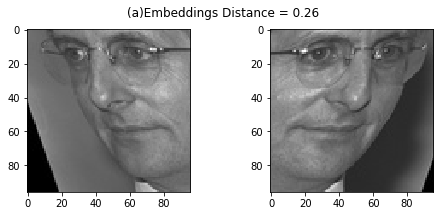

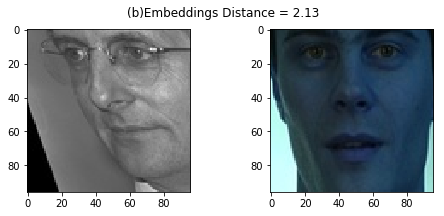

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(2, 3,'a')
func2(2, 12,'b')

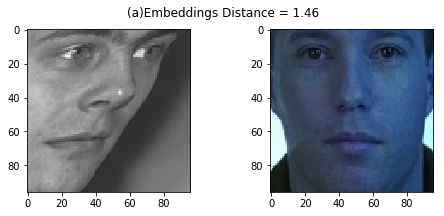

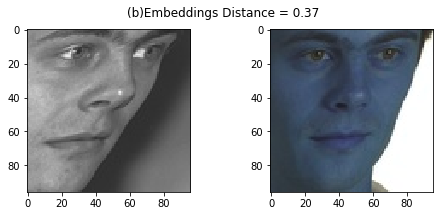

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(10, 350,'a')
func2(10, 9,'b')

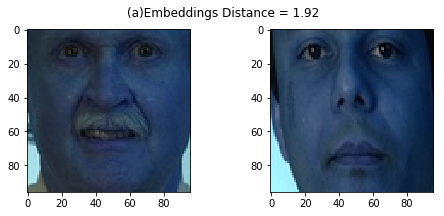

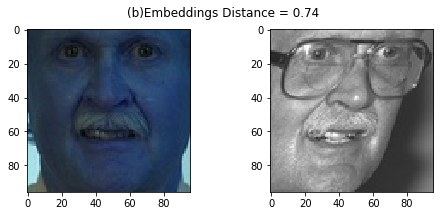

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(67, 700,'a')
func2(67, 66,'b')

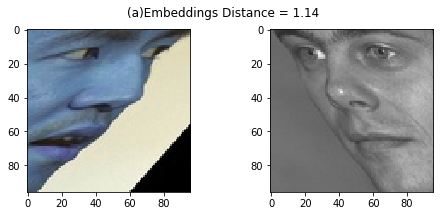

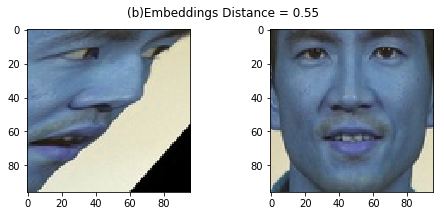

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(5000, 5,'a')
func2(5000,5001,'b')

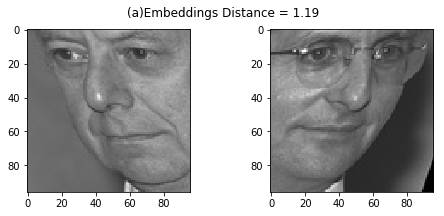

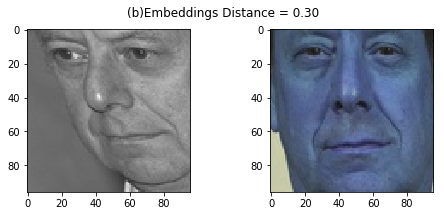

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(55, 3,'a')
func2(55, 57,'b')

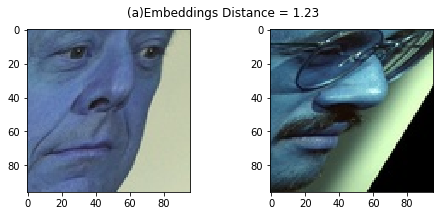

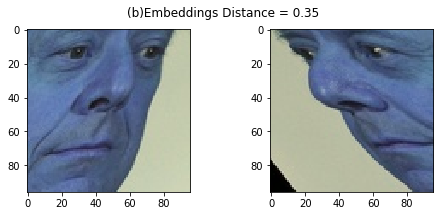

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(60, 39,'a')
func2(60, 61,'b')

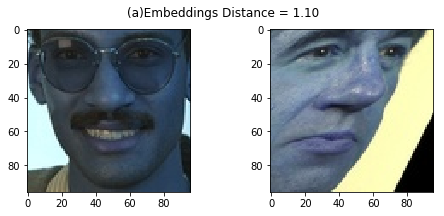

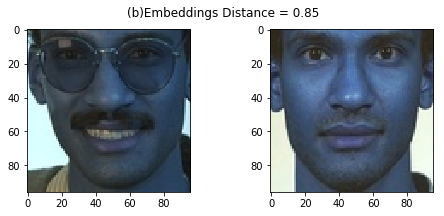

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
#testing the obtained embeddings on a single triplet generator
def func1(emb1, emb2):   #calaculate the distance bw embeddings
    return np.sum(np.square(emb1 - emb2))

def func2(idx1, idx2,m):   # display image pairs
    plt.figure(figsize=(8,3))
    plt.suptitle("("+m+")"+f'Embeddings Distance = {func1(embedded[idx1], embedded[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

func2(33,820,'a')
func2(33,40,'b')

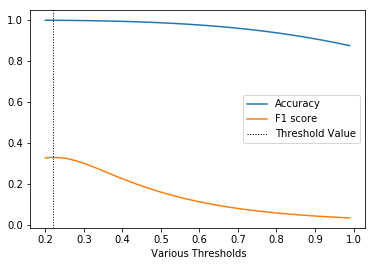

In [154]:
'''from sklearn.metrics import f1_score, accuracy_score

distances1 = [] # squared L2 distance between pairs
identical1 = [] # 1 if same identity, 0 otherwise

num1 = len(metadata)

for i in range(num1 - 1):
    for j in range(1, num1):
        distances1.append(func1(embedded[i], embedded[j]))
        identical1.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances1 = np.array(distances1)
identical1 = np.array(identical1)

thresholds1 = np.arange(0.20, 1.0, 0.01)

f1_scores1 = [f1_score(identical1, distances1 < t) for t in thresholds1]
acc_scores1 = [accuracy_score(identical1, distances1 < t) for t in thresholds1]

opt_idx1 = np.argmax(f1_scores1)
# Threshold at maximal F1 score
opt_tau1 = thresholds1[opt_idx1]
# Accuracy at maximal F1 score
opt_acc1 = accuracy_score(identical1, distances1 < opt_tau1)
'''
# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds1, acc_scores1, label='Accuracy');
plt.plot(thresholds1, f1_scores1, label='F1 score');
plt.axvline(x=opt_tau1, linestyle=':', lw=1, c='k', label='Threshold Value')
#plt.title(f'Accuracy(threshold= {opt_tau1:.2f} )is {opt_acc1:.3f}');
plt.xlabel(' Various Thresholds')
plt.legend();

In [39]:
opt_idx1

2

In [40]:
opt_tau1

0.22000000000000003

In [41]:
f1_scores1

[0.32519917904297097,
 0.32707670829132085,
 0.32747817307121224,
 0.32669701223748954,
 0.3257401649317291,
 0.32391330918822253,
 0.32087356714723436,
 0.31630313976104474,
 0.31128067189987374,
 0.3047551742593911,
 0.2985917988649731,
 0.29199113230746304,
 0.28453264977141196,
 0.27763763663761165,
 0.269947864652549,
 0.2617865176046144,
 0.25431916982190433,
 0.24636807882295295,
 0.23855544411219742,
 0.2307583316114178,
 0.22347949870209616,
 0.2164127862756697,
 0.20918869498748496,
 0.2020695493433343,
 0.19540430639151618,
 0.1886513213692031,
 0.18208466697762693,
 0.1759939056325287,
 0.17005052741948604,
 0.16405746417060962,
 0.1582119162221933,
 0.15280301064105892,
 0.147529483589572,
 0.14234367979997267,
 0.13724782619078574,
 0.13240484064506605,
 0.12783142939195238,
 0.12348884882539742,
 0.11912081591211644,
 0.11496034883889862,
 0.11099619865186243,
 0.10718685715310697,
 0.10351356999754976,
 0.09988466311911866,
 0.09646081849428217,
 0.09319579398642522,
 0

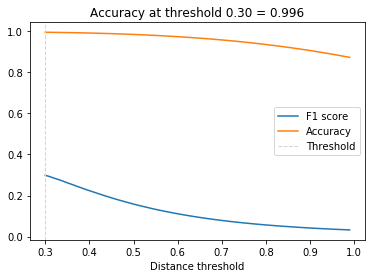

In [51]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        distances.append(func1(embedded[i], embedded[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.30, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

In [52]:
opt_idx

0

In [53]:
f1_scores

[0.2987659794576221,
 0.2921642660700135,
 0.2846954068588557,
 0.27780462604986,
 0.2701207322640054,
 0.26194880939113635,
 0.2544825505098353,
 0.2465289513622416,
 0.2387172839544782,
 0.23091831971305832,
 0.2236395840666924,
 0.21656727780244875,
 0.2093484957593215,
 0.20222490473147292,
 0.19555589424516548,
 0.18880234310333852,
 0.18223569283776497,
 0.1761459284579939,
 0.1702012917563217,
 0.16420963750381856,
 0.15835739890020087,
 0.15295172989776823,
 0.14767591520572662,
 0.14248716243776785,
 0.1373917432655013,
 0.13255056237974497,
 0.12797705345250973,
 0.12363092388154415,
 0.11925824925006819,
 0.115095429682954,
 0.1111325835169224,
 0.10732048573197767,
 0.10364798620119765,
 0.10001886368275939,
 0.09659374326066235,
 0.09332783497365982,
 0.09010092586250627,
 0.08702944787397764,
 0.08413240568532651,
 0.08127663255542443,
 0.07856486625345153,
 0.07590401195483944,
 0.07343008660086514,
 0.07102340749604702,
 0.06875159075260348,
 0.06653015866482827,
 0.064

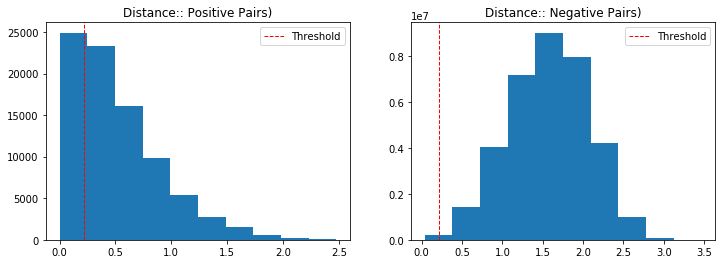

In [43]:
dist_pos1 = distances1[identical1 == 1]
dist_neg1 = distances1[identical1 == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos1)
plt.axvline(x=opt_tau1, linestyle='--', lw=1, c='red', label='Threshold')
plt.title('Distance:: Positive Pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg1)
plt.axvline(x=opt_tau1, linestyle='--', lw=1, c='red', label='Threshold')
plt.title('Distance:: Negative Pairs)')
plt.legend();

In [6]:
train_idx=[]
test_idx=[]
num=len(metadata)
i=0
count1=0
while(i<num):
    name=metadata[i].name
    name1=metadata[i].name
    print(name)
    count=0
    while(name==name1):
        count=count+1
        i=i+1
        if(i>=num):
            break
        name1=metadata[i].name
    print(count)
    count1=count1+count
    #i=i-count
    j=count1-1
    while(count>=3):
        p=2
        while(p):
            train_idx.append(metadata[j])
            j=j-1
            p=p-1
        test_idx.append(metadata[j])    
        count=count-3
        j=j-1
    if(count==2):
        train_idx.append(metadata[j])
        j=j-1
        print("dgh")
        test_idx.append(metadata[j])
        print("dhgfhd")
    count=count-2    
    if(count==1):
        train_idx.append(metadata[j])
    count=count-1    
        #j=j-1
    #test_idx = np.arange(metadata.shape[0]) % 2 == 0
     #   distances.append(func1(embedded[i], embedded[j]))
      #  identical.append(1 if metadata[i].name == metadata[j].name else 0)
        


00001
4
00002
23
dgh
dhgfhd
00003
21
00004
4
00005
11
dgh
dhgfhd
00006
7
00007
4
00008
4
00009
4
00010
4
00012
8
dgh
dhgfhd
00013
8
dgh
dhgfhd
00014
4
00015
4
00016
4
00017
4
00018
4
00019
18
00020
7
00021
4
00022
4
00023
4
00024
12
00025
4
00026
8
dgh
dhgfhd
00027
4
00028
17
dgh
dhgfhd
00029
64
00030
4
00031
4
00032
4
00033
4
00034
4
00035
4
00036
4
00037
4
00038
8
dgh
dhgfhd
00039
4
00040
8
dgh
dhgfhd
00041
4
00042
4
00043
3
00044
3
00045
3
00046
3
00047
4
00048
3
00049
3
00050
3
00051
3
00052
3
00053
3
00054
3
00055
3
00056
3
00057
3
00058
3
00059
3
00060
3
00061
3
00062
3
00063
3
00064
3
00065
3
00066
3
00067
3
00068
3
00069
3
00070
32
dgh
dhgfhd
00071
17
dgh
dhgfhd
00072
4
00073
3
00074
3
00075
3
00076
3
00077
3
00078
3
00079
3
00080
4
00081
19
00082
4
00083
7
00084
3
00085
3
00086
6
00087
3
00088
3
00089
3
00090
3
00091
3
00092
3
00093
29
dgh
dhgfhd
00094
3
00095
7
00096
7
00097
3
00098
3
00099
3
00100
3
00101
3
00102
3
00103
3
00104
3
00105
3
00106
3
00107
20
dgh
dhgfhd
00108
24

In [82]:
for i, m in enumerate(train_idx):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423


In [7]:
import numpy as np
import cv2
from model import create_model
json_file = open('encoding_model.json', 'r')

nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5') 
#nn4_small2_pretrained.load_weights('encoding_model.h5') 
embedded1 = np.zeros((3673, 128))  #training set embeddings
target1=[]  #training set y labels
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img
for i, m in enumerate(train_idx):
    m1=repr(m)
   # print(m1)
    y = m1.split('\\')
    #print(y)
    z=os.path.join(y[0], y[1],y[2])
    print(z)
    target1.append(y[1])
    img = load_image(z)
    img = (img / 255).astype(np.float32)
    embedded1[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    
    #img = load_image(m)
    # scale RGB values to interval [0,1]
    #img = (img / 255).astype(np.float32)
    # obtain embedding vector for image
    #embedded1[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

C:\Users\shreya kumari\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


dataset/aligned_resize\00001\00001_4.jpg
dataset/aligned_resize\00001\00001_3.jpg
dataset/aligned_resize\00002\00002_9.jpg
dataset/aligned_resize\00002\00002_8.jpg
dataset/aligned_resize\00002\00002_6.jpg
dataset/aligned_resize\00002\00002_5.jpg
dataset/aligned_resize\00002\00002_3.jpg
dataset/aligned_resize\00002\00002_23.jpg
dataset/aligned_resize\00002\00002_21.jpg
dataset/aligned_resize\00002\00002_20.jpg
dataset/aligned_resize\00002\00002_19.jpg
dataset/aligned_resize\00002\00002_18.jpg
dataset/aligned_resize\00002\00002_16.jpg
dataset/aligned_resize\00002\00002_15.jpg
dataset/aligned_resize\00002\00002_13.jpg
dataset/aligned_resize\00002\00002_12.jpg
dataset/aligned_resize\00002\00002_10.jpg
dataset/aligned_resize\00003\00003_9.jpg
dataset/aligned_resize\00003\00003_8.jpg
dataset/aligned_resize\00003\00003_6.jpg
dataset/aligned_resize\00003\00003_5.jpg
dataset/aligned_resize\00003\00003_3.jpg
dataset/aligned_resize\00003\00003_21.jpg
dataset/aligned_resize\00003\00003_2.jpg
datas

dataset/aligned_resize\00044\00044_2.jpg
dataset/aligned_resize\00045\00045_3.jpg
dataset/aligned_resize\00045\00045_2.jpg
dataset/aligned_resize\00046\00046_3.jpg
dataset/aligned_resize\00046\00046_2.jpg
dataset/aligned_resize\00047\00047_4.jpg
dataset/aligned_resize\00047\00047_3.jpg
dataset/aligned_resize\00048\00048_3.jpg
dataset/aligned_resize\00048\00048_2.jpg
dataset/aligned_resize\00049\00049_3.jpg
dataset/aligned_resize\00049\00049_2.jpg
dataset/aligned_resize\00050\00050_3.jpg
dataset/aligned_resize\00050\00050_2 - Copy.jpg
dataset/aligned_resize\00051\00051_3.jpg
dataset/aligned_resize\00051\00051_2.jpg
dataset/aligned_resize\00052\00052_3.jpg
dataset/aligned_resize\00052\00052_2.jpg
dataset/aligned_resize\00053\00053_3.jpg
dataset/aligned_resize\00053\00053_2.jpg
dataset/aligned_resize\00054\00054_3.jpg
dataset/aligned_resize\00054\00054_2.jpg
dataset/aligned_resize\00055\00055_3.jpg
dataset/aligned_resize\00055\00055_2.jpg
dataset/aligned_resize\00056\00056_3.jpg
dataset/a

dataset/aligned_resize\00108\00108_8.jpg
dataset/aligned_resize\00108\00108_6.jpg
dataset/aligned_resize\00108\00108_5.jpg
dataset/aligned_resize\00108\00108_3.jpg
dataset/aligned_resize\00108\00108_24.jpg
dataset/aligned_resize\00108\00108_22.jpg
dataset/aligned_resize\00108\00108_21.jpg
dataset/aligned_resize\00108\00108_2.jpg
dataset/aligned_resize\00108\00108_19.jpg
dataset/aligned_resize\00108\00108_17.jpg
dataset/aligned_resize\00108\00108_16.jpg
dataset/aligned_resize\00108\00108_14.jpg
dataset/aligned_resize\00108\00108_13.jpg
dataset/aligned_resize\00108\00108_11.jpg
dataset/aligned_resize\00108\00108_10.jpg
dataset/aligned_resize\00109\00109_3.jpg
dataset/aligned_resize\00109\00109_2.jpg
dataset/aligned_resize\00110\00110_3.jpg
dataset/aligned_resize\00110\00110_2.jpg
dataset/aligned_resize\00111\00111_4.jpg
dataset/aligned_resize\00111\00111_3.jpg
dataset/aligned_resize\00112\00112_3.jpg
dataset/aligned_resize\00112\00112_2.jpg
dataset/aligned_resize\00113\00113_3.jpg
datase

dataset/aligned_resize\00176\00176_2.jpg
dataset/aligned_resize\00177\00177_3.jpg
dataset/aligned_resize\00177\00177_2.jpg
dataset/aligned_resize\00178\00178_3.jpg
dataset/aligned_resize\00178\00178_2.jpg
dataset/aligned_resize\00179\00179_3.jpg
dataset/aligned_resize\00179\00179_2.jpg
dataset/aligned_resize\00180\00180_3.jpg
dataset/aligned_resize\00180\00180_2.jpg
dataset/aligned_resize\00181\00181_4.jpg
dataset/aligned_resize\00181\00181_3.jpg
dataset/aligned_resize\00182\00182_9.jpg
dataset/aligned_resize\00182\00182_8.jpg
dataset/aligned_resize\00182\00182_6.jpg
dataset/aligned_resize\00182\00182_5.jpg
dataset/aligned_resize\00182\00182_3.jpg
dataset/aligned_resize\00182\00182_2.jpg
dataset/aligned_resize\00182\00182_15.jpg
dataset/aligned_resize\00182\00182_14.jpg
dataset/aligned_resize\00182\00182_12.jpg
dataset/aligned_resize\00182\00182_11.jpg
dataset/aligned_resize\00183\00183_5.jpg
dataset/aligned_resize\00183\00183_4.jpg
dataset/aligned_resize\00183\00183_2.jpg
dataset/alig

dataset/aligned_resize\00254\00254_12.jpg
dataset/aligned_resize\00254\00254_11.jpg
dataset/aligned_resize\00255\00255_4.jpg
dataset/aligned_resize\00255\00255_3.jpg
dataset/aligned_resize\00256\00256_9.jpg
dataset/aligned_resize\00256\00256_8.jpg
dataset/aligned_resize\00256\00256_6.jpg
dataset/aligned_resize\00256\00256_5.jpg
dataset/aligned_resize\00256\00256_3.jpg
dataset/aligned_resize\00256\00256_24.jpg
dataset/aligned_resize\00256\00256_22.jpg
dataset/aligned_resize\00256\00256_21.jpg
dataset/aligned_resize\00256\00256_2.jpg
dataset/aligned_resize\00256\00256_19.jpg
dataset/aligned_resize\00256\00256_17.jpg
dataset/aligned_resize\00256\00256_16.jpg
dataset/aligned_resize\00256\00256_14.jpg
dataset/aligned_resize\00256\00256_13.jpg
dataset/aligned_resize\00256\00256_11.jpg
dataset/aligned_resize\00256\00256_10.jpg
dataset/aligned_resize\00257\00257_4.jpg
dataset/aligned_resize\00257\00257_3.jpg
dataset/aligned_resize\00258\00258_3.jpg
dataset/aligned_resize\00258\00258_2.jpg
data

dataset/aligned_resize\00318\00318_4.jpg
dataset/aligned_resize\00318\00318_3.jpg
dataset/aligned_resize\00319\00319_4.jpg
dataset/aligned_resize\00319\00319_3.jpg
dataset/aligned_resize\00320\00320_4.jpg
dataset/aligned_resize\00320\00320_3.jpg
dataset/aligned_resize\00321\00321_4.jpg
dataset/aligned_resize\00321\00321_3.jpg
dataset/aligned_resize\00322\00322_4.jpg
dataset/aligned_resize\00322\00322_3.jpg
dataset/aligned_resize\00323\00323_4.jpg
dataset/aligned_resize\00323\00323_3.jpg
dataset/aligned_resize\00324\00324_4.jpg
dataset/aligned_resize\00324\00324_3.jpg
dataset/aligned_resize\00325\00325_8.jpg
dataset/aligned_resize\00325\00325_7.jpg
dataset/aligned_resize\00325\00325_5.jpg
dataset/aligned_resize\00325\00325_4.jpg
dataset/aligned_resize\00325\00325_2.jpg
dataset/aligned_resize\00326\00326_8.jpg
dataset/aligned_resize\00326\00326_7.jpg
dataset/aligned_resize\00326\00326_5.jpg
dataset/aligned_resize\00326\00326_4.jpg
dataset/aligned_resize\00326\00326_2.jpg
dataset/aligned_

dataset/aligned_resize\00396\00396_4.jpg
dataset/aligned_resize\00396\00396_3.jpg
dataset/aligned_resize\00397\00397_3.jpg
dataset/aligned_resize\00397\00397_2.jpg
dataset/aligned_resize\00398\00398_4.jpg
dataset/aligned_resize\00398\00398_3.jpg
dataset/aligned_resize\00399\00399_4.jpg
dataset/aligned_resize\00399\00399_3.jpg
dataset/aligned_resize\00400\00400_4.jpg
dataset/aligned_resize\00400\00400_3.jpg
dataset/aligned_resize\00401\00401_3.jpg
dataset/aligned_resize\00401\00401_2.jpg
dataset/aligned_resize\00402\00402_4.jpg
dataset/aligned_resize\00402\00402_3.jpg
dataset/aligned_resize\00403\00403_4.jpg
dataset/aligned_resize\00403\00403_3.jpg
dataset/aligned_resize\00404\00404_4.jpg
dataset/aligned_resize\00404\00404_3.jpg
dataset/aligned_resize\00405\00405_3.jpg
dataset/aligned_resize\00405\00405_2.jpg
dataset/aligned_resize\00406\00406_4.jpg
dataset/aligned_resize\00406\00406_3.jpg
dataset/aligned_resize\00407\00407_4.jpg
dataset/aligned_resize\00407\00407_3.jpg
dataset/aligned_

dataset/aligned_resize\00469\00469_3.jpg
dataset/aligned_resize\00469\00469_29.jpg
dataset/aligned_resize\00469\00469_27.jpg
dataset/aligned_resize\00469\00469_26.jpg
dataset/aligned_resize\00469\00469_24.jpg
dataset/aligned_resize\00469\00469_23.jpg
dataset/aligned_resize\00469\00469_21.jpg
dataset/aligned_resize\00469\00469_20.jpg
dataset/aligned_resize\00469\00469_19.jpg
dataset/aligned_resize\00469\00469_18.jpg
dataset/aligned_resize\00469\00469_16.jpg
dataset/aligned_resize\00469\00469_15.jpg
dataset/aligned_resize\00469\00469_13.jpg
dataset/aligned_resize\00469\00469_12.jpg
dataset/aligned_resize\00469\00469_10.jpg
dataset/aligned_resize\00470\00470_9.jpg
dataset/aligned_resize\00470\00470_8.jpg
dataset/aligned_resize\00470\00470_6.jpg
dataset/aligned_resize\00470\00470_5.jpg
dataset/aligned_resize\00470\00470_3.jpg
dataset/aligned_resize\00470\00470_2.jpg
dataset/aligned_resize\00470\00470_14.jpg
dataset/aligned_resize\00470\00470_13.jpg
dataset/aligned_resize\00470\00470_11.jpg

dataset/aligned_resize\00498\00498_8.jpg
dataset/aligned_resize\00498\00498_6.jpg
dataset/aligned_resize\00498\00498_5.jpg
dataset/aligned_resize\00498\00498_3.jpg
dataset/aligned_resize\00498\00498_2.jpg
dataset/aligned_resize\00498\00498_14.jpg
dataset/aligned_resize\00498\00498_13.jpg
dataset/aligned_resize\00498\00498_11.jpg
dataset/aligned_resize\00498\00498_10.jpg
dataset/aligned_resize\00499\00499_7.jpg
dataset/aligned_resize\00499\00499_6.jpg
dataset/aligned_resize\00499\00499_4.jpg
dataset/aligned_resize\00499\00499_3.jpg
dataset/aligned_resize\00500\00500_9.jpg
dataset/aligned_resize\00500\00500_8.jpg
dataset/aligned_resize\00500\00500_6.jpg
dataset/aligned_resize\00500\00500_5.jpg
dataset/aligned_resize\00500\00500_3.jpg
dataset/aligned_resize\00500\00500_2.jpg
dataset/aligned_resize\00500\00500_14.jpg
dataset/aligned_resize\00500\00500_13.jpg
dataset/aligned_resize\00500\00500_11.jpg
dataset/aligned_resize\00500\00500_10.jpg
dataset/aligned_resize\00501\00501_9.jpg
dataset/

dataset/aligned_resize\00524\00524_8.jpg
dataset/aligned_resize\00524\00524_6.jpg
dataset/aligned_resize\00524\00524_5.jpg
dataset/aligned_resize\00524\00524_3.jpg
dataset/aligned_resize\00524\00524_2.jpg
dataset/aligned_resize\00524\00524_11.jpg
dataset/aligned_resize\00524\00524_10.jpg
dataset/aligned_resize\00525\00525_6.jpg
dataset/aligned_resize\00525\00525_5.jpg
dataset/aligned_resize\00525\00525_3.jpg
dataset/aligned_resize\00525\00525_2.jpg
dataset/aligned_resize\00526\00526_7.jpg
dataset/aligned_resize\00526\00526_6.jpg
dataset/aligned_resize\00526\00526_4.jpg
dataset/aligned_resize\00526\00526_3.jpg
dataset/aligned_resize\00527\00527_6.jpg
dataset/aligned_resize\00527\00527_5.jpg
dataset/aligned_resize\00527\00527_3.jpg
dataset/aligned_resize\00527\00527_2.jpg
dataset/aligned_resize\00528\00528_6.jpg
dataset/aligned_resize\00528\00528_5.jpg
dataset/aligned_resize\00528\00528_3.jpg
dataset/aligned_resize\00528\00528_2.jpg
dataset/aligned_resize\00529\00529_6.jpg
dataset/aligne

dataset/aligned_resize\00549\00549_14.jpg
dataset/aligned_resize\00549\00549_13.jpg
dataset/aligned_resize\00549\00549_11.jpg
dataset/aligned_resize\00549\00549_10.jpg
dataset/aligned_resize\00550\00550_9.jpg
dataset/aligned_resize\00550\00550_8.jpg
dataset/aligned_resize\00550\00550_6.jpg
dataset/aligned_resize\00550\00550_5.jpg
dataset/aligned_resize\00550\00550_3.jpg
dataset/aligned_resize\00550\00550_2.jpg
dataset/aligned_resize\00550\00550_12.jpg
dataset/aligned_resize\00550\00550_11.jpg
dataset/aligned_resize\00551\00551_8.jpg
dataset/aligned_resize\00551\00551_7.jpg
dataset/aligned_resize\00551\00551_5.jpg
dataset/aligned_resize\00551\00551_4.jpg
dataset/aligned_resize\00551\00551_2.jpg
dataset/aligned_resize\00552\00552_8.jpg
dataset/aligned_resize\00552\00552_7.jpg
dataset/aligned_resize\00552\00552_5.jpg
dataset/aligned_resize\00552\00552_4.jpg
dataset/aligned_resize\00552\00552_2.jpg
dataset/aligned_resize\00553\00553_9.jpg
dataset/aligned_resize\00553\00553_8.jpg
dataset/al

dataset/aligned_resize\00576\00576_2.jpg
dataset/aligned_resize\00576\00576_16.jpg
dataset/aligned_resize\00576\00576_15.jpg
dataset/aligned_resize\00576\00576_13.jpg
dataset/aligned_resize\00576\00576_12.jpg
dataset/aligned_resize\00576\00576_10.jpg
dataset/aligned_resize\00577\00577_9.jpg
dataset/aligned_resize\00577\00577_8.jpg
dataset/aligned_resize\00577\00577_6.jpg
dataset/aligned_resize\00577\00577_5.jpg
dataset/aligned_resize\00577\00577_3.jpg
dataset/aligned_resize\00577\00577_2.jpg
dataset/aligned_resize\00578\00578_9.jpg
dataset/aligned_resize\00578\00578_8.jpg
dataset/aligned_resize\00578\00578_6.jpg
dataset/aligned_resize\00578\00578_5.jpg
dataset/aligned_resize\00578\00578_3.jpg
dataset/aligned_resize\00578\00578_2.jpg
dataset/aligned_resize\00579\00579_9.jpg
dataset/aligned_resize\00579\00579_8.jpg
dataset/aligned_resize\00579\00579_6.jpg
dataset/aligned_resize\00579\00579_5.jpg
dataset/aligned_resize\00579\00579_3.jpg
dataset/aligned_resize\00579\00579_2.jpg
dataset/ali

dataset/aligned_resize\00599\00599_5.jpg
dataset/aligned_resize\00599\00599_3.jpg
dataset/aligned_resize\00599\00599_2.jpg
dataset/aligned_resize\00600\00600_9.jpg
dataset/aligned_resize\00600\00600_8.jpg
dataset/aligned_resize\00600\00600_6.jpg
dataset/aligned_resize\00600\00600_5.jpg
dataset/aligned_resize\00600\00600_3.jpg
dataset/aligned_resize\00600\00600_20.jpg
dataset/aligned_resize\00600\00600_19.jpg
dataset/aligned_resize\00600\00600_18.jpg
dataset/aligned_resize\00600\00600_16.jpg
dataset/aligned_resize\00600\00600_15.jpg
dataset/aligned_resize\00600\00600_13.jpg
dataset/aligned_resize\00600\00600_12.jpg
dataset/aligned_resize\00600\00600_10.jpg
dataset/aligned_resize\00601\00601_9.jpg
dataset/aligned_resize\00601\00601_8.jpg
dataset/aligned_resize\00601\00601_6.jpg
dataset/aligned_resize\00601\00601_5.jpg
dataset/aligned_resize\00601\00601_3.jpg
dataset/aligned_resize\00601\00601_2.jpg
dataset/aligned_resize\00602\00602_9.jpg
dataset/aligned_resize\00602\00602_8.jpg
dataset/

dataset/aligned_resize\00622\00622_2.jpg
dataset/aligned_resize\00622\00622_18.jpg
dataset/aligned_resize\00622\00622_17.jpg
dataset/aligned_resize\00622\00622_15.jpg
dataset/aligned_resize\00622\00622_14.jpg
dataset/aligned_resize\00622\00622_12.jpg
dataset/aligned_resize\00622\00622_11.jpg
dataset/aligned_resize\00623\00623_8.jpg
dataset/aligned_resize\00623\00623_7.jpg
dataset/aligned_resize\00623\00623_5.jpg
dataset/aligned_resize\00623\00623_4.jpg
dataset/aligned_resize\00623\00623_2.jpg
dataset/aligned_resize\00624\00624_9.jpg
dataset/aligned_resize\00624\00624_8.jpg
dataset/aligned_resize\00624\00624_6.jpg
dataset/aligned_resize\00624\00624_5.jpg
dataset/aligned_resize\00624\00624_3.jpg
dataset/aligned_resize\00624\00624_2.jpg
dataset/aligned_resize\00625\00625_9.jpg
dataset/aligned_resize\00625\00625_8.jpg
dataset/aligned_resize\00625\00625_6.jpg
dataset/aligned_resize\00625\00625_5.jpg
dataset/aligned_resize\00625\00625_3.jpg
dataset/aligned_resize\00625\00625_2.jpg
dataset/al

dataset/aligned_resize\00648\00648_16.jpg
dataset/aligned_resize\00648\00648_14.jpg
dataset/aligned_resize\00648\00648_13.jpg
dataset/aligned_resize\00648\00648_11.jpg
dataset/aligned_resize\00648\00648_10.jpg
dataset/aligned_resize\00650\00650_7.jpg
dataset/aligned_resize\00650\00650_6.jpg
dataset/aligned_resize\00650\00650_4.jpg
dataset/aligned_resize\00650\00650_3.jpg
dataset/aligned_resize\00652\00652_9.jpg
dataset/aligned_resize\00652\00652_8.jpg
dataset/aligned_resize\00652\00652_6.jpg
dataset/aligned_resize\00652\00652_5.jpg
dataset/aligned_resize\00652\00652_3.jpg
dataset/aligned_resize\00652\00652_2.jpg
dataset/aligned_resize\00653\00653_9.jpg
dataset/aligned_resize\00653\00653_8.jpg
dataset/aligned_resize\00653\00653_6.jpg
dataset/aligned_resize\00653\00653_5.jpg
dataset/aligned_resize\00653\00653_3.jpg
dataset/aligned_resize\00653\00653_2.jpg
dataset/aligned_resize\00654\00654_9.jpg
dataset/aligned_resize\00654\00654_8.jpg
dataset/aligned_resize\00654\00654_6.jpg
dataset/ali

dataset/aligned_resize\00679\00679_8.jpg
dataset/aligned_resize\00679\00679_6.jpg
dataset/aligned_resize\00679\00679_5.jpg
dataset/aligned_resize\00679\00679_3.jpg
dataset/aligned_resize\00679\00679_2.jpg
dataset/aligned_resize\00680\00680_9.jpg
dataset/aligned_resize\00680\00680_8.jpg
dataset/aligned_resize\00680\00680_6.jpg
dataset/aligned_resize\00680\00680_5.jpg
dataset/aligned_resize\00680\00680_3.jpg
dataset/aligned_resize\00680\00680_2.jpg
dataset/aligned_resize\00680\00680_10.jpg
dataset/aligned_resize\00681\00681_9.jpg
dataset/aligned_resize\00681\00681_8.jpg
dataset/aligned_resize\00681\00681_6.jpg
dataset/aligned_resize\00681\00681_5.jpg
dataset/aligned_resize\00681\00681_3.jpg
dataset/aligned_resize\00681\00681_2.jpg
dataset/aligned_resize\00681\00681_10.jpg
dataset/aligned_resize\00682\00682_8.jpg
dataset/aligned_resize\00682\00682_7.jpg
dataset/aligned_resize\00682\00682_5.jpg
dataset/aligned_resize\00682\00682_4.jpg
dataset/aligned_resize\00682\00682_2.jpg
dataset/aligne

dataset/aligned_resize\00706\00706_22.jpg
dataset/aligned_resize\00706\00706_20.jpg
dataset/aligned_resize\00706\00706_2.jpg
dataset/aligned_resize\00706\00706_18.jpg
dataset/aligned_resize\00706\00706_17.jpg
dataset/aligned_resize\00706\00706_15.jpg
dataset/aligned_resize\00706\00706_14.jpg
dataset/aligned_resize\00706\00706_12.jpg
dataset/aligned_resize\00706\00706_11.jpg
dataset/aligned_resize\00707\00707_9.jpg
dataset/aligned_resize\00707\00707_8.jpg
dataset/aligned_resize\00707\00707_6.jpg
dataset/aligned_resize\00707\00707_5.jpg
dataset/aligned_resize\00707\00707_3.jpg
dataset/aligned_resize\00707\00707_21.jpg
dataset/aligned_resize\00707\00707_2.jpg
dataset/aligned_resize\00707\00707_19.jpg
dataset/aligned_resize\00707\00707_17.jpg
dataset/aligned_resize\00707\00707_16.jpg
dataset/aligned_resize\00707\00707_14.jpg
dataset/aligned_resize\00707\00707_13.jpg
dataset/aligned_resize\00707\00707_11.jpg
dataset/aligned_resize\00707\00707_10.jpg
dataset/aligned_resize\00708\00708_9.jpg


dataset/aligned_resize\00719\00719_13.jpg
dataset/aligned_resize\00719\00719_11.jpg
dataset/aligned_resize\00719\00719_10.jpg
dataset/aligned_resize\00720\00720_9.jpg
dataset/aligned_resize\00720\00720_8.jpg
dataset/aligned_resize\00720\00720_6.jpg
dataset/aligned_resize\00720\00720_5.jpg
dataset/aligned_resize\00720\00720_3.jpg
dataset/aligned_resize\00720\00720_28.jpg
dataset/aligned_resize\00720\00720_26.jpg
dataset/aligned_resize\00720\00720_25.jpg
dataset/aligned_resize\00720\00720_23.jpg
dataset/aligned_resize\00720\00720_22.jpg
dataset/aligned_resize\00720\00720_20.jpg
dataset/aligned_resize\00720\00720_2.jpg
dataset/aligned_resize\00720\00720_18.jpg
dataset/aligned_resize\00720\00720_17.jpg
dataset/aligned_resize\00720\00720_15.jpg
dataset/aligned_resize\00720\00720_14.jpg
dataset/aligned_resize\00720\00720_12.jpg
dataset/aligned_resize\00720\00720_11.jpg
dataset/aligned_resize\00721\00721_9.jpg
dataset/aligned_resize\00721\00721_8.jpg
dataset/aligned_resize\00721\00721_6.jpg
d

dataset/aligned_resize\00734\00734_8.jpg
dataset/aligned_resize\00734\00734_6.jpg
dataset/aligned_resize\00734\00734_5.jpg
dataset/aligned_resize\00734\00734_3.jpg
dataset/aligned_resize\00734\00734_2.jpg
dataset/aligned_resize\00734\00734_10.jpg
dataset/aligned_resize\00735\00735_9.jpg
dataset/aligned_resize\00735\00735_8.jpg
dataset/aligned_resize\00735\00735_6.jpg
dataset/aligned_resize\00735\00735_5.jpg
dataset/aligned_resize\00735\00735_3.jpg
dataset/aligned_resize\00735\00735_2.jpg
dataset/aligned_resize\00735\00735_12.jpg
dataset/aligned_resize\00735\00735_11.jpg
dataset/aligned_resize\00736\00736_9.jpg
dataset/aligned_resize\00736\00736_8.jpg
dataset/aligned_resize\00736\00736_6.jpg
dataset/aligned_resize\00736\00736_5.jpg
dataset/aligned_resize\00736\00736_3.jpg
dataset/aligned_resize\00736\00736_2.jpg
dataset/aligned_resize\00736\00736_18.jpg
dataset/aligned_resize\00736\00736_17.jpg
dataset/aligned_resize\00736\00736_15.jpg
dataset/aligned_resize\00736\00736_14.jpg
dataset/a

In [99]:
len(embedded1)

3673

In [100]:
len(train_idx)

3673

In [107]:
target1[3672]

'00739'

In [102]:
embedded1[3672]

array([ 0.09430254,  0.140922  , -0.01781159, -0.04152969, -0.02599258,
        0.00764229,  0.02753244, -0.10941973, -0.06490128,  0.03822251,
        0.1173196 , -0.08757313, -0.02991378,  0.08930394, -0.00782327,
       -0.07249622,  0.04060597,  0.21882164,  0.1007807 , -0.0089653 ,
        0.03514873,  0.12634002, -0.02799362,  0.00038812, -0.05307001,
        0.022987  , -0.01849074,  0.02547933,  0.15611745,  0.13503398,
       -0.16184859, -0.07116202,  0.01171155, -0.08796932,  0.20211796,
       -0.06294775,  0.05758699,  0.10041076,  0.10955323, -0.04555395,
       -0.16244434,  0.12145752, -0.04068104,  0.04562171, -0.09995112,
        0.02048373,  0.04835333,  0.00745929, -0.09465833,  0.00623888,
       -0.03257849,  0.1584933 , -0.01442237,  0.09135517, -0.02455716,
       -0.01943728,  0.10614055,  0.01987275, -0.08317317, -0.07281976,
        0.02630064, -0.00985364,  0.18876019,  0.01814852, -0.03412841,
        0.01499388,  0.0568923 , -0.06473218,  0.01153537,  0.05

In [77]:
train_idx

[dataset/aligned_resize\00001\00001_4.jpg,
 dataset/aligned_resize\00001\00001_3.jpg,
 dataset/aligned_resize\00002\00002_9.jpg,
 dataset/aligned_resize\00002\00002_8.jpg,
 dataset/aligned_resize\00002\00002_6.jpg,
 dataset/aligned_resize\00002\00002_5.jpg,
 dataset/aligned_resize\00002\00002_3.jpg,
 dataset/aligned_resize\00002\00002_23.jpg,
 dataset/aligned_resize\00002\00002_21.jpg,
 dataset/aligned_resize\00002\00002_20.jpg,
 dataset/aligned_resize\00002\00002_19.jpg,
 dataset/aligned_resize\00002\00002_18.jpg,
 dataset/aligned_resize\00002\00002_16.jpg,
 dataset/aligned_resize\00002\00002_15.jpg,
 dataset/aligned_resize\00002\00002_13.jpg,
 dataset/aligned_resize\00002\00002_12.jpg,
 dataset/aligned_resize\00002\00002_10.jpg,
 dataset/aligned_resize\00003\00003_9.jpg,
 dataset/aligned_resize\00003\00003_8.jpg,
 dataset/aligned_resize\00003\00003_6.jpg,
 dataset/aligned_resize\00003\00003_5.jpg,
 dataset/aligned_resize\00003\00003_3.jpg,
 dataset/aligned_resize\00003\00003_21.jpg,


In [72]:
count1

5926

In [75]:
len(embedded)

5926

In [78]:
test_idx

[dataset/aligned_resize\00001\00001_2.jpg,
 dataset/aligned_resize\00002\00002_7.jpg,
 dataset/aligned_resize\00002\00002_4.jpg,
 dataset/aligned_resize\00002\00002_22.jpg,
 dataset/aligned_resize\00002\00002_2.jpg,
 dataset/aligned_resize\00002\00002_17.jpg,
 dataset/aligned_resize\00002\00002_14.jpg,
 dataset/aligned_resize\00002\00002_11.jpg,
 dataset/aligned_resize\00002\00002_1.jpg,
 dataset/aligned_resize\00003\00003_7.jpg,
 dataset/aligned_resize\00003\00003_4.jpg,
 dataset/aligned_resize\00003\00003_20.jpg,
 dataset/aligned_resize\00003\00003_18.jpg,
 dataset/aligned_resize\00003\00003_15.jpg,
 dataset/aligned_resize\00003\00003_12.jpg,
 dataset/aligned_resize\00003\00003_1.jpg,
 dataset/aligned_resize\00004\00004_2.jpg,
 dataset/aligned_resize\00005\00005_7.jpg,
 dataset/aligned_resize\00005\00005_4.jpg,
 dataset/aligned_resize\00005\00005_11.jpg,
 dataset/aligned_resize\00005\00005_1.jpg,
 dataset/aligned_resize\00006\00006_5.jpg,
 dataset/aligned_resize\00006\00006_2.jpg,
 d

In [103]:
len(test_idx)

1912

In [8]:
import numpy as np
import cv2
from model import create_model
json_file = open('encoding_model.json', 'r')

nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5') 
#nn4_small2_pretrained.load_weights('encoding_model.h5') 
embedded2 = np.zeros((1912, 128))  #testing set embeddings
target2=[]  #testing set y labels
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img
for i, m in enumerate(test_idx):
    m1=repr(m)
   # print(m1)
    y = m1.split('\\')
    #print(y)
    z=os.path.join(y[0], y[1],y[2])
    print(z)
    target2.append(y[1])
    img = load_image(z)
    img = (img / 255).astype(np.float32)
    embedded2[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    
    #img = load_image(m)
    # scale RGB values to interval [0,1]
    #img = (img / 255).astype(np.float32)
    # obtain embedding vector for image
    #embedded1[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

dataset/aligned_resize\00001\00001_2.jpg
dataset/aligned_resize\00002\00002_7.jpg
dataset/aligned_resize\00002\00002_4.jpg
dataset/aligned_resize\00002\00002_22.jpg
dataset/aligned_resize\00002\00002_2.jpg
dataset/aligned_resize\00002\00002_17.jpg
dataset/aligned_resize\00002\00002_14.jpg
dataset/aligned_resize\00002\00002_11.jpg
dataset/aligned_resize\00002\00002_1.jpg
dataset/aligned_resize\00003\00003_7.jpg
dataset/aligned_resize\00003\00003_4.jpg
dataset/aligned_resize\00003\00003_20.jpg
dataset/aligned_resize\00003\00003_18.jpg
dataset/aligned_resize\00003\00003_15.jpg
dataset/aligned_resize\00003\00003_12.jpg
dataset/aligned_resize\00003\00003_1.jpg
dataset/aligned_resize\00004\00004_2.jpg
dataset/aligned_resize\00005\00005_7.jpg
dataset/aligned_resize\00005\00005_4.jpg
dataset/aligned_resize\00005\00005_11.jpg
dataset/aligned_resize\00005\00005_1.jpg
dataset/aligned_resize\00006\00006_5.jpg
dataset/aligned_resize\00006\00006_2.jpg
dataset/aligned_resize\00007\00007_2.jpg
dataset

dataset/aligned_resize\00107\00107_4.jpg
dataset/aligned_resize\00107\00107_2.jpg
dataset/aligned_resize\00107\00107_17.jpg
dataset/aligned_resize\00107\00107_14.jpg
dataset/aligned_resize\00107\00107_11.jpg
dataset/aligned_resize\00107\00107_1.jpg
dataset/aligned_resize\00108\00108_7.jpg
dataset/aligned_resize\00108\00108_4.jpg
dataset/aligned_resize\00108\00108_23.jpg
dataset/aligned_resize\00108\00108_20.jpg
dataset/aligned_resize\00108\00108_18.jpg
dataset/aligned_resize\00108\00108_15.jpg
dataset/aligned_resize\00108\00108_12.jpg
dataset/aligned_resize\00108\00108_1.jpg
dataset/aligned_resize\00109\00109_1.jpg
dataset/aligned_resize\00110\00110_1.jpg
dataset/aligned_resize\00111\00111_2.jpg
dataset/aligned_resize\00112\00112_1.jpg
dataset/aligned_resize\00113\00113_1.jpg
dataset/aligned_resize\00114\00114_1.jpg
dataset/aligned_resize\00115\00115_1.jpg
dataset/aligned_resize\00116\00116_1.jpg
dataset/aligned_resize\00117\00117_1.jpg
dataset/aligned_resize\00118\00118_1.jpg
dataset/

dataset/aligned_resize\00247\00247_4.jpg
dataset/aligned_resize\00247\00247_13.jpg
dataset/aligned_resize\00247\00247_10.jpg
dataset/aligned_resize\00248\00248_2.jpg
dataset/aligned_resize\00249\00249_2.jpg
dataset/aligned_resize\00250\00250_2.jpg
dataset/aligned_resize\00251\00251_2.jpg
dataset/aligned_resize\00252\00252_2.jpg
dataset/aligned_resize\00253\00253_3.jpg
dataset/aligned_resize\00253\00253_1.jpg
dataset/aligned_resize\00254\00254_7.jpg
dataset/aligned_resize\00254\00254_4.jpg
dataset/aligned_resize\00254\00254_16.jpg
dataset/aligned_resize\00254\00254_13.jpg
dataset/aligned_resize\00254\00254_10.jpg
dataset/aligned_resize\00255\00255_2.jpg
dataset/aligned_resize\00256\00256_7.jpg
dataset/aligned_resize\00256\00256_4.jpg
dataset/aligned_resize\00256\00256_23.jpg
dataset/aligned_resize\00256\00256_20.jpg
dataset/aligned_resize\00256\00256_18.jpg
dataset/aligned_resize\00256\00256_15.jpg
dataset/aligned_resize\00256\00256_12.jpg
dataset/aligned_resize\00256\00256_1.jpg
datase

dataset/aligned_resize\00379\00379_2.jpg
dataset/aligned_resize\00380\00380_2.jpg
dataset/aligned_resize\00381\00381_2.jpg
dataset/aligned_resize\00383\00383_7.jpg
dataset/aligned_resize\00383\00383_4.jpg
dataset/aligned_resize\00383\00383_22.jpg
dataset/aligned_resize\00383\00383_2.jpg
dataset/aligned_resize\00383\00383_17.jpg
dataset/aligned_resize\00383\00383_14.jpg
dataset/aligned_resize\00383\00383_11.jpg
dataset/aligned_resize\00383\00383_1.jpg
dataset/aligned_resize\00384\00384_1.jpg
dataset/aligned_resize\00385\00385_2.jpg
dataset/aligned_resize\00386\00386_2.jpg
dataset/aligned_resize\00387\00387_3.jpg
dataset/aligned_resize\00387\00387_1.jpg
dataset/aligned_resize\00388\00388_2.jpg
dataset/aligned_resize\00389\00389_2.jpg
dataset/aligned_resize\00390\00390_2.jpg
dataset/aligned_resize\00391\00391_1.jpg
dataset/aligned_resize\00392\00392_6.jpg
dataset/aligned_resize\00392\00392_3.jpg
dataset/aligned_resize\00392\00392_1.jpg
dataset/aligned_resize\00393\00393_6.jpg
dataset/alig

dataset/aligned_resize\00538\00538_1.jpg
dataset/aligned_resize\00539\00539_5.jpg
dataset/aligned_resize\00539\00539_2.jpg
dataset/aligned_resize\00540\00540_6.jpg
dataset/aligned_resize\00540\00540_3.jpg
dataset/aligned_resize\00540\00540_1.jpg
dataset/aligned_resize\00541\00541_5.jpg
dataset/aligned_resize\00541\00541_2.jpg
dataset/aligned_resize\00542\00542_4.jpg
dataset/aligned_resize\00542\00542_1.jpg
dataset/aligned_resize\00543\00543_7.jpg
dataset/aligned_resize\00543\00543_4.jpg
dataset/aligned_resize\00543\00543_12.jpg
dataset/aligned_resize\00543\00543_1.jpg
dataset/aligned_resize\00544\00544_7.jpg
dataset/aligned_resize\00544\00544_4.jpg
dataset/aligned_resize\00544\00544_12.jpg
dataset/aligned_resize\00544\00544_1.jpg
dataset/aligned_resize\00545\00545_7.jpg
dataset/aligned_resize\00545\00545_4.jpg
dataset/aligned_resize\00545\00545_16.jpg
dataset/aligned_resize\00545\00545_13.jpg
dataset/aligned_resize\00545\00545_10.jpg
dataset/aligned_resize\00546\00546_7.jpg
dataset/ali

dataset/aligned_resize\00588\00588_16.jpg
dataset/aligned_resize\00588\00588_13.jpg
dataset/aligned_resize\00588\00588_10.jpg
dataset/aligned_resize\00589\00589_7.jpg
dataset/aligned_resize\00589\00589_4.jpg
dataset/aligned_resize\00589\00589_1.jpg
dataset/aligned_resize\00590\00590_6.jpg
dataset/aligned_resize\00590\00590_3.jpg
dataset/aligned_resize\00590\00590_1.jpg
dataset/aligned_resize\00591\00591_7.jpg
dataset/aligned_resize\00591\00591_4.jpg
dataset/aligned_resize\00591\00591_10.jpg
dataset/aligned_resize\00592\00592_7.jpg
dataset/aligned_resize\00592\00592_4.jpg
dataset/aligned_resize\00592\00592_10.jpg
dataset/aligned_resize\00593\00593_7.jpg
dataset/aligned_resize\00593\00593_4.jpg
dataset/aligned_resize\00593\00593_17.jpg
dataset/aligned_resize\00593\00593_14.jpg
dataset/aligned_resize\00593\00593_11.jpg
dataset/aligned_resize\00593\00593_1.jpg
dataset/aligned_resize\00594\00594_7.jpg
dataset/aligned_resize\00594\00594_4.jpg
dataset/aligned_resize\00594\00594_29.jpg
dataset

dataset/aligned_resize\00631\00631_7.jpg
dataset/aligned_resize\00631\00631_4.jpg
dataset/aligned_resize\00631\00631_10.jpg
dataset/aligned_resize\00632\00632_6.jpg
dataset/aligned_resize\00632\00632_3.jpg
dataset/aligned_resize\00632\00632_1.jpg
dataset/aligned_resize\00633\00633_6.jpg
dataset/aligned_resize\00633\00633_3.jpg
dataset/aligned_resize\00633\00633_1.jpg
dataset/aligned_resize\00634\00634_7.jpg
dataset/aligned_resize\00634\00634_4.jpg
dataset/aligned_resize\00634\00634_10.jpg
dataset/aligned_resize\00635\00635_7.jpg
dataset/aligned_resize\00635\00635_4.jpg
dataset/aligned_resize\00635\00635_10.jpg
dataset/aligned_resize\00636\00636_6.jpg
dataset/aligned_resize\00636\00636_3.jpg
dataset/aligned_resize\00636\00636_1.jpg
dataset/aligned_resize\00637\00637_7.jpg
dataset/aligned_resize\00637\00637_4.jpg
dataset/aligned_resize\00637\00637_10.jpg
dataset/aligned_resize\00638\00638_7.jpg
dataset/aligned_resize\00638\00638_4.jpg
dataset/aligned_resize\00638\00638_2.jpg
dataset/alig

dataset/aligned_resize\00688\00688_4.jpg
dataset/aligned_resize\00688\00688_11.jpg
dataset/aligned_resize\00688\00688_1.jpg
dataset/aligned_resize\00689\00689_7.jpg
dataset/aligned_resize\00689\00689_4.jpg
dataset/aligned_resize\00689\00689_1.jpg
dataset/aligned_resize\00690\00690_7.jpg
dataset/aligned_resize\00690\00690_4.jpg
dataset/aligned_resize\00690\00690_10.jpg
dataset/aligned_resize\00691\00691_7.jpg
dataset/aligned_resize\00691\00691_4.jpg
dataset/aligned_resize\00691\00691_10.jpg
dataset/aligned_resize\00692\00692_7.jpg
dataset/aligned_resize\00692\00692_4.jpg
dataset/aligned_resize\00692\00692_1.jpg
dataset/aligned_resize\00693\00693_7.jpg
dataset/aligned_resize\00693\00693_4.jpg
dataset/aligned_resize\00693\00693_10.jpg
dataset/aligned_resize\00694\00694_6.jpg
dataset/aligned_resize\00694\00694_3.jpg
dataset/aligned_resize\00694\00694_1.jpg
dataset/aligned_resize\00695\00695_7.jpg
dataset/aligned_resize\00695\00695_4.jpg
dataset/aligned_resize\00695\00695_10.jpg
dataset/ali

dataset/aligned_resize\00723\00723_7.jpg
dataset/aligned_resize\00723\00723_4.jpg
dataset/aligned_resize\00723\00723_10.jpg
dataset/aligned_resize\00724\00724_7.jpg
dataset/aligned_resize\00724\00724_4.jpg
dataset/aligned_resize\00724\00724_20.jpg
dataset/aligned_resize\00724\00724_18.jpg
dataset/aligned_resize\00724\00724_15.jpg
dataset/aligned_resize\00724\00724_12.jpg
dataset/aligned_resize\00724\00724_1.jpg
dataset/aligned_resize\00725\00725_7.jpg
dataset/aligned_resize\00725\00725_4.jpg
dataset/aligned_resize\00725\00725_16.jpg
dataset/aligned_resize\00725\00725_13.jpg
dataset/aligned_resize\00725\00725_10.jpg
dataset/aligned_resize\00726\00726_7.jpg
dataset/aligned_resize\00726\00726_4.jpg
dataset/aligned_resize\00726\00726_17.jpg
dataset/aligned_resize\00726\00726_14.jpg
dataset/aligned_resize\00726\00726_11.jpg
dataset/aligned_resize\00726\00726_1.jpg
dataset/aligned_resize\00727\00727_7.jpg
dataset/aligned_resize\00727\00727_4.jpg
dataset/aligned_resize\00727\00727_17.jpg
data

In [109]:
len(embedded2)

1912

In [110]:
len(target2)

1912

In [111]:
target2

['00001',
 '00002',
 '00002',
 '00002',
 '00002',
 '00002',
 '00002',
 '00002',
 '00002',
 '00003',
 '00003',
 '00003',
 '00003',
 '00003',
 '00003',
 '00003',
 '00004',
 '00005',
 '00005',
 '00005',
 '00005',
 '00006',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010',
 '00012',
 '00012',
 '00012',
 '00013',
 '00013',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00019',
 '00019',
 '00019',
 '00019',
 '00019',
 '00020',
 '00020',
 '00021',
 '00022',
 '00023',
 '00024',
 '00024',
 '00024',
 '00024',
 '00025',
 '00026',
 '00026',
 '00026',
 '00027',
 '00028',
 '00028',
 '00028',
 '00028',
 '00028',
 '00028',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00029',
 '00030',
 '00031',
 '00032',
 '00033',
 '00034',
 '00035',
 '00036',
 '00037',
 '00038',
 '00038',
 '00038',
 '00039',
 '00040',
 '00040',
 '00040',


In [112]:
target2[1911]

'00739'

In [71]:
train_idx

[dataset/aligned_resize\00001\00001_4.jpg,
 dataset/aligned_resize\00001\00001_3.jpg,
 dataset/aligned_resize\00002\00002_9.jpg,
 dataset/aligned_resize\00002\00002_8.jpg,
 dataset/aligned_resize\00002\00002_6.jpg,
 dataset/aligned_resize\00002\00002_5.jpg,
 dataset/aligned_resize\00002\00002_3.jpg,
 dataset/aligned_resize\00002\00002_23.jpg,
 dataset/aligned_resize\00002\00002_21.jpg,
 dataset/aligned_resize\00002\00002_20.jpg,
 dataset/aligned_resize\00002\00002_19.jpg,
 dataset/aligned_resize\00002\00002_18.jpg,
 dataset/aligned_resize\00002\00002_16.jpg,
 dataset/aligned_resize\00002\00002_15.jpg,
 dataset/aligned_resize\00002\00002_13.jpg,
 dataset/aligned_resize\00002\00002_12.jpg,
 dataset/aligned_resize\00002\00002_10.jpg,
 dataset/aligned_resize\00003\00003_9.jpg,
 dataset/aligned_resize\00003\00003_8.jpg,
 dataset/aligned_resize\00003\00003_6.jpg,
 dataset/aligned_resize\00003\00003_5.jpg,
 dataset/aligned_resize\00003\00003_3.jpg,
 dataset/aligned_resize\00003\00003_21.jpg,


In [15]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

#targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
#encoder.fit(targets)

encoder.fit(target1)
encoder.fit(target2)
# Numerical encoding of identities
y = encoder.transform(targets)
y1 = encoder.transform(target1)
y2 = encoder.transform(target2)


#train_idx = np.arange(metadata.shape[0]) % 2 != 0
#test_idx = np.arange(metadata.shape[0]) % 2 == 0

#X_train = embedded[train_idx]
X_train=embedded1

#X_test = embedded[test_idx]
X_test=embedded2

#y_train = y[train_idx]
y_train=y1
y_test =y2

#knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

#knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

#acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

#print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true =y_test
y_probas =y_pred
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

[[1 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 7]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.70      0.88      0.78         8
          2       0.71      0.71      0.71         7
          3       0.00      0.00      0.00         1
          4       0.60      0.75      0.67         4
          5       1.00      0.50      0.67         2
          6       1.00      1.00      1.00         1
          7       0.00      0.00      0.00         1
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      0.67      0.80         3
         11       0.75      1.00      0.86         3
         12       0.50      1.00      0.67         1
         13       0.00      0.00      0.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.0

C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ModuleNotFoundError: No module named 'scikitplot'

In [120]:
for n in range(1, 3):
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train, y_train)
    acc_knn = accuracy_score(y_test, knn.predict(X_test))
    print(acc_knn)

0.7092050209205021
0.6370292887029289


C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


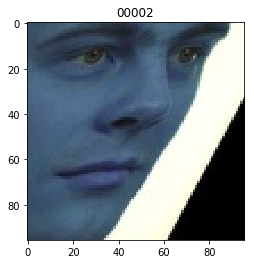

In [149]:
import warnings
example_idx = 3
m1=repr(test_idx[3])
   # print(m1)
y = m1.split('\\')
    #print(y)
z=os.path.join(y[0], y[1],y[2])
    #print(z)
    #target2.append(y[1])
img = load_image(z)
img = (img / 255).astype(np.float32)
#example_image = load_image(test_idx[example_idx])
example_prediction = svc.predict([embedded2[3]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'{example_identity}');

C:\Users\shreya kumari\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


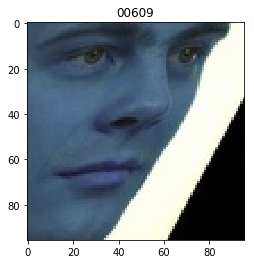

In [150]:
import warnings
example_idx = 1300
m1=repr(test_idx[1300])
   # print(m1)
y = m1.split('\\')
    #print(y)
z=os.path.join(y[0], y[1],y[2])
    #print(z)
    #target2.append(y[1])
img = load_image(z)
img = (img / 255).astype(np.float32)
#example_image = load_image(test_idx[example_idx])
example_prediction = svc.predict([embedded2[1300]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'{example_identity}');